In [1]:
path=  'C:/Users/felip/OneDrive - Universidad Técnica Federico Santa María/Documentos/Brain/'
#import sys
#sys.path.append(path) 
path_=  'C:/Users/felip/OneDrive - Universidad Técnica Federico Santa María/Documentos/Brain/Brain_Age_Clock/Base_Models'
import sys
sys.path.append(path_) 

# Regresor

In [23]:
from sklearn.linear_model import Lasso
from base_regressor import BaseRegressor
from Plotter import Plotter
from skopt.space import Real, Categorical, Integer

class LassoRegressor(BaseRegressor):
    def __init__(self, save_path=None, scaler=None, params=None, params_space=None, fit_params_search=None, model_params_search=None, fit_params_train=None, model_params_train=None, name_model="Lasso"):
        super().__init__(save_path, scaler, params, params_space, fit_params_search, model_params_search, fit_params_train, model_params_train, name_model)

        self.model_ml = Lasso
        if params is None:
            self.params = {
                'alpha': 0.2,
                'max_iter': 10000,
                #'tol': 0.001
            }
        if params_space is None:
            self.params_space = {
                'alpha': Real(0.001, 10.0, prior='log-uniform'),
                'max_iter': Integer(100, 10000),
                'tol': Real(1e-5, 1e-2, prior='log-uniform')
            }


In [39]:
from sklearn.linear_model import ElasticNet
from base_regressor import BaseRegressor
from Plotter import Plotter
from skopt.space import Real, Categorical, Integer

class ElasticNetRegressor(BaseRegressor):
    def __init__(self, save_path=None, scaler=None, params=None, params_space=None, fit_params_search=None, model_params_search=None, fit_params_train=None, model_params_train=None, name_model="ElasticNet"):
        super().__init__(save_path, scaler, params, params_space, fit_params_search, model_params_search, fit_params_train, model_params_train, name_model)

        self.model_ml = ElasticNet
        if params is None:
            self.params = {
                'alpha': 0.2,
                'l1_ratio': 0.5,  # Proporción de L1 en la regularización
                'max_iter': 10000,
                # 'tol': 0.001
            }
        if params_space is None:
            self.params_space = {
                'alpha': Real(0.001, 0.05, prior='log-uniform'),
                'l1_ratio': Real(0.0, 1.0),  # Rango de 0 a 1 para la proporción de L1
                'max_iter': Integer(100, 10000),
                'tol': Real(1e-5, 1e-2, prior='log-uniform')
            }


# Clasificador

In [40]:
from base_classifier import BaseClassifier
from skopt.space import Real, Categorical, Integer
import xgboost as xgb

from sklearn.model_selection import StratifiedShuffleSplit
from sklearn.model_selection import train_test_split, KFold
from sklearn.model_selection import StratifiedKFold


class XGBoostClassifier(BaseClassifier):
    def __init__(self, save_path=None, scaler=None, params=None, params_space=None, fit_params_search=None, model_params_search=None, fit_params_train=None, model_params_train=None, name_model="Lasso"):
        super().__init__(save_path, scaler, params, params_space, fit_params_search, model_params_search, fit_params_train, model_params_train, name_model)

        self.model_ml = xgb.XGBClassifier
        if params is None:
            self.params = {
            'objective': 'binary:logistic',  # Clasificación binaria
            'eval_metric': 'logloss',       # Métrica de evaluación
            'learning_rate': 0.1,           # Tasa de aprendizaje
            'max_depth': 6,                 # Profundidad máxima del árbol
            'subsample': 0.8,               # Proporción de muestras utilizadas por árbol
            'colsample_bytree': 0.8,        # Proporción de características utilizadas por árbol
            'reg_alpha': 0.1,               # Regularización L1
            'reg_lambda': 1.0,              # Regularización L2
            'gamma': 0.0,                   # Mínima reducción de pérdida para crear una división
            'min_child_weight': 1,          # Mínimo peso de la suma de los hijos para una división
            'n_estimators': 100,            # Número de árboles en el modelo
            'scale_pos_weight': 1.0         # Para datos desbalanceados
        }
        if params_space is None:
            self.params_space = {
                'objective'   : ['binary:logistic'],
                'eval_metric' : ['logloss', 'error', 'auc', 'aucpr'],
                'learning_rate': (0.01, 0.1, 0.2),
                'max_depth': (3, 4, 5),
                'subsample': (0.8, 0.9, 1.0),
                'colsample_bytree': (0.8, 0.9, 1.0),
                'reg_alpha': (0, 0.1, 1.0),
                'reg_lambda': (0, 0.1, 1.0),
                #'gamma': (0.001, 0.01, 0.1, 1, 10),
            }

# Plot

In [4]:
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd

# Crear una función para graficar el boxplot
def graficar_boxplot_horizontal(dataframes, labels, variable, group_by, colores, title="Boxplot por Región"):
   
    # Crear una lista para almacenar los datos combinados
    datos_combinados = []
    for df, label in zip(dataframes, labels):
        temp_df = df[[group_by, variable]].copy()
        temp_df['Dataset'] = label
        datos_combinados.append(temp_df)
    
    # Concatenar todos los dataframes
    datos_combinados = pd.concat(datos_combinados, ignore_index=True)

    # Crear el gráfico de boxplot
    plt.figure(figsize=(8, 8))
    sns.boxplot(
        data=datos_combinados, 
        y=group_by, 
        x=variable, 
        hue='Dataset',
        palette=colores
    )
    plt.title(title, fontsize=16)
    plt.xlabel(variable, fontsize=14)
    plt.ylabel(group_by, fontsize=14)
    plt.legend(title='Dataset', fontsize=12, loc='lower right')
    plt.grid(axis='x', linestyle='--', alpha=0.7)
    plt.tight_layout()
    plt.show()

# Instancia de modelos 

In [11]:
from Plotter import Plotter
from sklearn.preprocessing import MinMaxScaler,StandardScaler

model_reg = LassoRegressor()

Plotters = Plotter()

# Parametros de Plot
colorset = 'darkorange'
nameset = 'Lasso'

#parametros de scaler
#1:sin scaler 2:Zscore 3:MinMax
Scaler_reg_train=2

#scaler = MinMaxScaler()
Scaler_reg = StandardScaler()

model_cls = XGBoostClassifier()


In [9]:
#72 features
features = ['Alpha2_canon_EPP_HPC_left', 'Alpha2_canon_EPP_HPC_right', 'Alpha2_canon_EPP_PARIET_left', 'Alpha2_canon_EPP_PARIET_right', 'Alpha2_canon_EPP_OCC_left', 'Alpha2_canon_EPP_OCC_right', 'Alpha2_canon_RPD_HPC_left', 'Alpha2_canon_RPD_HPC_right', 'Alpha2_canon_RPD_CING_left', 'Alpha2_canon_RPD_CING_right', 'Alpha2_canon_RPD_PARIET_left', 'Alpha2_canon_RPD_PARIET_right', 'Alpha2_canon_RPD_OCC_left', 'Alpha2_canon_RPD_OCC_right', 'High_subj_spec_EPP_HPC_left', 'High_subj_spec_EPP_HPC_right', 'High_subj_spec_EPP_CING_left', 'High_subj_spec_EPP_CING_right', 'High_subj_spec_EPP_PARIET_left', 'High_subj_spec_EPP_PARIET_right', 'High_subj_spec_EPP_OCC_left', 'High_subj_spec_EPP_OCC_right', 'High_subj_spec_RPD_HPC_left', 'High_subj_spec_RPD_HPC_right', 'High_subj_spec_RPD_CING_left', 'High_subj_spec_RPD_CING_right', 'High_subj_spec_RPD_PARIET_left', 'High_subj_spec_RPD_PARIET_right', 'High_subj_spec_RPD_OCC_left', 'High_subj_spec_RPD_OCC_right', 'Low_subj_spec_EPP_HPC_left', 'Low_subj_spec_EPP_HPC_right', 'Low_subj_spec_EPP_CING_left', 'Low_subj_spec_EPP_CING_right', 'Low_subj_spec_EPP_PARIET_left', 'Low_subj_spec_EPP_PARIET_right', 'Low_subj_spec_EPP_OCC_left', 'Low_subj_spec_EPP_OCC_right', 'Low_subj_spec_RPD_HPC_left', 'Low_subj_spec_RPD_HPC_right', 'Low_subj_spec_RPD_CING_left', 'Low_subj_spec_RPD_CING_right', 'Low_subj_spec_RPD_PARIET_left', 'Low_subj_spec_RPD_PARIET_right', 'Low_subj_spec_RPD_OCC_left', 'Low_subj_spec_RPD_OCC_right', 'TF_ORB_left', 'TF_ORB_right', 'TF_IFG_left', 'TF_IFG_right', 'TF_MFG_left', 'TF_MFG_right', 'TF_SFG_left', 'TF_SFG_right', 'TF_HPC_left', 'TF_HPC_right', 'TF_INS_left', 'TF_INS_right', 'IAF_ORB_left', 'IAF_ORB_right', 'IAF_IFG_left', 'IAF_IFG_right', 'IAF_MFG_left', 'IAF_MFG_right', 'IAF_SFG_left', 'IAF_SFG_right', 'IAF_HPC_left', 'IAF_HPC_right', 'IAF_INS_left', 'IAF_INS_right', 'IAF_OCC_left', 'IAF_OCC_right']

In [41]:
model_reg = ElasticNetRegressor()


# Data

In [42]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import MinMaxScaler,StandardScaler
import pickle


file_path_CN = f'{path}Brain_Age_Clock/data_freq/CN_freq.xlsx'
file_path_AD = f'{path}Brain_Age_Clock/data_freq/AD_freq.xlsx'
file_path_FTD = f'{path}Brain_Age_Clock/data_freq/FTD_freq.xlsx'
file_path_MCI = f'{path}Brain_Age_Clock/data_freq/MCI_freq.xlsx'

df_CN = pd.read_excel(file_path_CN)
df_AD = pd.read_excel(file_path_AD)
df_FTD = pd.read_excel(file_path_FTD)
df_MCI = pd.read_excel(file_path_MCI)

df_CN_filtrado = df_CN[(df_CN['Age'] >=50) & (df_CN['Age'] <= 90)].reset_index(drop=True)
df_AD_filtrado = df_AD[(df_AD['Age'] >= 50) & (df_AD['Age'] <= 90)].reset_index(drop=True)
df_FTD_filtrado = df_FTD[(df_FTD['Age'] >= 50) & (df_FTD['Age'] <= 90)].reset_index(drop=True)
df_MCI_filtrado = df_MCI[(df_MCI['Age'] >= 50) & (df_MCI['Age'] <= 90)].reset_index(drop=True)


In [28]:
X_AD = df_AD_filtrado[features]
y_AD = df_AD_filtrado["Age"]
ID_AD = df_AD_filtrado["ID_unique"]

X_FTD = df_FTD_filtrado[features]
y_FTD = df_FTD_filtrado["Age"]
ID_FTD = df_FTD_filtrado["ID_unique"]

X_MCI = df_MCI_filtrado[features]
y_MCI = df_MCI_filtrado["Age"]
ID_MCI = df_MCI_filtrado["ID_unique"]

In [29]:
df_CN_filtrado

,Unnamed: 0,Delta_canon_EPP_ORB_left,Delta_canon_EPP_ORB_right,Delta_canon_EPP_IFG_left,Delta_canon_EPP_IFG_right,Delta_canon_EPP_MFG_left,Delta_canon_EPP_MFG_right,Delta_canon_EPP_SFG_left,Delta_canon_EPP_SFG_right,Delta_canon_EPP_HPC_left,...,Age,Sex,Educ,MMSE,HDI,GINI,ODQ,ID_unique,Country_unique,Region
0,1,0.054096,0.047097,0.056917,0.044670,0.055201,0.042544,0.048499,0.039344,0.041028,...,57.0,2.0,13.0,NaN,0.7578,40.70,99.739738,1,Cuba,Cuba
1,27,0.040123,0.048480,0.047047,0.092690,0.033214,0.044383,0.037216,0.043145,0.032845,...,55.0,2.0,13.0,30.0,0.7578,40.70,98.976304,27,Cuba,Cuba
2,47,0.059309,0.040455,0.040989,0.039929,0.040812,0.048901,0.044654,0.042213,0.033875,...,62.0,2.0,14.0,NaN,0.7578,40.70,99.324324,47,Cuba,Cuba
3,55,0.037787,0.028286,0.026936,0.029210,0.022287,0.030809,0.026381,0.028117,0.030884,...,62.0,2.0,13.0,30.0,0.7578,40.70,99.691591,55,Cuba,Cuba
4,63,0.015843,0.020785,0.013620,0.015678,0.012296,0.012214,0.014991,0.018343,0.011985,...,56.0,2.0,14.0,NaN,0.7578,40.70,99.656632,63,Cuba,Cuba
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
676,1443,0.032968,0.036678,0.030297,0.035435,0.032923,0.035019,0.033158,0.033050,0.033604,...,74.0,2.0,12.0,30.0,0.8550,44.92,98.650235,1378,Chile,America
677,1444,0.035464,0.035469,0.035834,0.034404,0.030824,0.030423,0.031417,0.031326,0.038548,...,57.0,2.0,17.0,30.0,0.8550,44.92,99.599221,1379,Chile,America
678,1446,0.044759,0.052309,0.042457,0.046901,0.038112,0.037699,0.038526,0.039239,0.049349,...,57.0,2.0,17.0,29.0,0.8550,44.92,99.641446,1381,Chile,America
679,1447,0.059905,0.064894,0.052238,0.051449,0.039586,0.041117,0.042107,0.041310,0.050399,...,69.0,2.0,12.0,30.0,0.8550,44.92,98.420503,1382,Chile,America


# America Europa Turquia Cuba

In [43]:
# Definir las regiones para cada subconjunto
regiones_1 = ["America", "Turquia"]
regiones_2 = ["America", "Europa","Turquia", "Cuba"]

# Filtrar las filas del dataframe por región
df_CN_1 = df_CN_filtrado[df_CN_filtrado["Region"].isin(regiones_1)]
df_CN_2 = df_CN_filtrado[df_CN_filtrado["Region"].isin(regiones_2)]

# Seleccionar las columnas correspondientes para cada conjunto
X_CN_1 = df_CN_1[features]
y_CN_1 = df_CN_1["Age"]
ID_CN_1 = df_CN_1["ID_unique"]

X_CN_2 = df_CN_2[features]
y_CN_2 = df_CN_2["Age"]
ID_CN_2 = df_CN_2["ID_unique"]

scaler = StandardScaler()
scaler.fit(X_CN_1)

X_CN_1_scaled = scaler.transform(X_CN_1)
X_CN_1_scaled = pd.DataFrame(X_CN_1_scaled, columns=X_CN_1.columns)

df_concatenado_CN = pd.concat([X_CN_1, y_CN_1, ID_CN_1], axis=1, ignore_index=False)

In [44]:
opt_model, best_params = model_reg.search_best_model (X=X_CN_1_scaled, y=y_CN_1, n_iter_=50, scoring_metric='r2')


Fitting 10 folds for each of 1 candidates, totalling 10 fits
Fitting 10 folds for each of 1 candidates, totalling 10 fits
Fitting 10 folds for each of 1 candidates, totalling 10 fits
Fitting 10 folds for each of 1 candidates, totalling 10 fits
Fitting 10 folds for each of 1 candidates, totalling 10 fits
Fitting 10 folds for each of 1 candidates, totalling 10 fits
Fitting 10 folds for each of 1 candidates, totalling 10 fits
Fitting 10 folds for each of 1 candidates, totalling 10 fits
Fitting 10 folds for each of 1 candidates, totalling 10 fits
Fitting 10 folds for each of 1 candidates, totalling 10 fits
Fitting 10 folds for each of 1 candidates, totalling 10 fits
Fitting 10 folds for each of 1 candidates, totalling 10 fits
Fitting 10 folds for each of 1 candidates, totalling 10 fits
Fitting 10 folds for each of 1 candidates, totalling 10 fits
Fitting 10 folds for each of 1 candidates, totalling 10 fits
Fitting 10 folds for each of 1 candidates, totalling 10 fits
Fitting 10 folds for eac

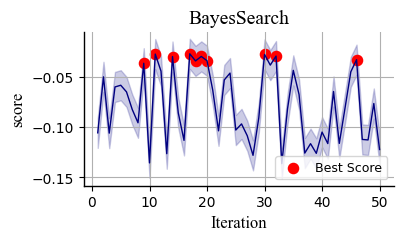

Top 1: Iteration 17, Score -0.026888907034756528
Top 2: Iteration 11, Score -0.02717400343275723
Top 3: Iteration 30, Score -0.027536277219321482
Top 4: Iteration 32, Score -0.02917314290161128
Top 5: Iteration 19, Score -0.029531268615292917
Top 6: Iteration 14, Score -0.029644131132757524
Top 7: Iteration 46, Score -0.03277652888859879
Top 8: Iteration 20, Score -0.03377490286894521
Top 9: Iteration 18, Score -0.0339782050183559
Top 10: Iteration 9, Score -0.03629958690253764


In [45]:
score = opt_model.cv_results_['mean_test_score'][:50]
Plotters.plot_iteration(y=score, title='BayesSearch', xlabel='Iteration', ylabel='score', legend_result=False, best_result=True, y_size=2, font='Times New Roman', weight='normal', mode=2, band_width=0.015)

In [46]:
best_params_ = model_reg.best_hyper(num_best=10, opt_model=opt_model, num_max=50)
best_params_

[{'alpha': 0.049999999999999996,
  'l1_ratio': 1.0,
  'max_iter': 10000,
  'tol': 1e-05},
 {'alpha': 0.049999999999999996,
  'l1_ratio': 1.0,
  'max_iter': 100,
  'tol': 1e-05},
 {'alpha': 0.049582912163409036,
  'l1_ratio': 0.967019919436256,
  'max_iter': 9725,
  'tol': 1.0225106978521208e-05},
 {'alpha': 0.04931552848933444,
  'l1_ratio': 0.8565809254919905,
  'max_iter': 5619,
  'tol': 0.0008027921227990277},
 {'alpha': 0.048051617778554975,
  'l1_ratio': 0.9192242775482995,
  'max_iter': 970,
  'tol': 0.004524852512805898},
 {'alpha': 0.04935215279364506,
  'l1_ratio': 0.8880882556745117,
  'max_iter': 9189,
  'tol': 0.009804073935567016},
 {'alpha': 0.04275821734550829,
  'l1_ratio': 0.9530964414720728,
  'max_iter': 714,
  'tol': 0.004221066913480856},
 {'alpha': 0.04074334055776972,
  'l1_ratio': 0.9675617431649477,
  'max_iter': 567,
  'tol': 1.3966432169595315e-05},
 {'alpha': 0.04900955257163191,
  'l1_ratio': 0.5170567453132157,
  'max_iter': 1275,
  'tol': 1.27055399512729

In [47]:
results_labels_df_CN_train, results_labels_df_CN_test,  results_model, results_per_fold_CN_train, results_per_fold_CN_test, df_CN_avg_train,df_CN_avg_test= model_reg.trainer(
        X=X_CN_1,
        y=y_CN_1,
        ID_label='ID_unique',
        ID=ID_CN_1,
        n_splits=10,
        n_iterations=20,
        params_=best_params_[0]
    )

C:\Users/felip/OneDrive - Universidad Técnica Federico Santa María/Documentos/Brain/Brain_Age_Clock/Base_Models\base_regressor.py:207: FutureWarning: The behavior of DataFrame concatenation with empty or all-NA entries is deprecated. In a future version, this will no longer exclude empty or all-NA columns when determining the result dtypes. To retain the old behavior, exclude the relevant entries before the concat operation.
  results_labels_df_train = pd.concat([results_labels_df_train, temp_df_train], ignore_index=True)
C:\Users/felip/OneDrive - Universidad Técnica Federico Santa María/Documentos/Brain/Brain_Age_Clock/Base_Models\base_regressor.py:209: FutureWarning: The behavior of DataFrame concatenation with empty or all-NA entries is deprecated. In a future version, this will no longer exclude empty or all-NA columns when determining the result dtypes. To retain the old behavior, exclude the relevant entries before the concat operation.
  results_labels_df_test = pd.concat([resul

                            OLS Regression Results                            
Dep. Variable:                 y_pred   R-squared:                       0.155
Model:                            OLS   Adj. R-squared:                  0.153
Method:                 Least Squares   F-statistic:                     89.51
Date:                Tue, 14 Jan 2025   Prob (F-statistic):           1.29e-19
Time:                        15:57:40   Log-Likelihood:                -1165.5
No. Observations:                 491   AIC:                             2335.
Df Residuals:                     489   BIC:                             2343.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         57.2734      0.903     63.429      0.0

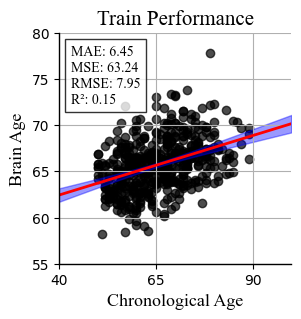

Error medio absoluto: 6.4470872143230435
Error cuadrático medio: 63.23745721402037
Raíz del error cuadrático medio: 7.952198262997494
Coeficiente de determinación (R²): 0.15038922802867494


In [48]:
Plotters.plot_regresion(y=df_CN_avg_train['y_pred'],x= df_CN_avg_train['y_labels'], label_='Test Data',x_ticks_step=25,y_ticks_step=5,x_min_limit=40,y_min_limit=55,x_max_limit=100,y_max_limit=80,color='Black', title='Train Performance',line_ideal=False,confidence_interval=True,  alpha=0.7,xlabel='Chronological Age',ylabel='Brain Age',color_confidence_interval='blue',alpha_confidence_interval=0.4,color_line_fit='red', details=True, font='Times New Roman', weight='normal', x_size=3,y_size=3, legend=False, fontsize=13, mode=2)

In [50]:
results_labels_df_CN_2_test, results_per_fold_CN_2_test, df_CN_2_avg_test = model_reg.test(X=X_CN_2, y=y_CN_2, ID= ID_CN_2, ID_label='ID_unique', n_splits=10, n_iterations=20,result_model=results_model)
results_labels_df_AD_test, results_per_fold_AD_test, df_AD_avg_test = model_reg.test(X=X_AD, y=y_AD, ID= ID_AD, ID_label='ID_unique', n_splits=10, n_iterations=20,result_model=results_model)
results_labels_df_FTD_test, results_per_fold_FTD_test, df_FTD_avg_test = model_reg.test(X=X_FTD, y=y_FTD, ID= ID_FTD, ID_label='ID_unique', n_splits=10, n_iterations=20,result_model=results_model)
results_labels_df_MCI_test, results_per_fold_MCI_test, df_MCI_avg_test = model_reg.test(X=X_MCI, y=y_MCI, ID= ID_MCI, ID_label='ID_unique', n_splits=10, n_iterations=20,result_model=results_model)


C:\Users/felip/OneDrive - Universidad Técnica Federico Santa María/Documentos/Brain/Brain_Age_Clock/Base_Models\base_regressor.py:296: FutureWarning: The behavior of DataFrame concatenation with empty or all-NA entries is deprecated. In a future version, this will no longer exclude empty or all-NA columns when determining the result dtypes. To retain the old behavior, exclude the relevant entries before the concat operation.
  results_labels_df_test = pd.concat([results_labels_df_test, temp_pat_df], ignore_index=True)
C:\Users/felip/OneDrive - Universidad Técnica Federico Santa María/Documentos/Brain/Brain_Age_Clock/Base_Models\base_regressor.py:296: FutureWarning: The behavior of DataFrame concatenation with empty or all-NA entries is deprecated. In a future version, this will no longer exclude empty or all-NA columns when determining the result dtypes. To retain the old behavior, exclude the relevant entries before the concat operation.
  results_labels_df_test = pd.concat([results_l

In [51]:
df_CN_1_seleccion = df_CN_filtrado[['ID_unique', 'Country_unique','Region', 'Age', 'Sex', 'Educ', 'MMSE', 'HDI', 'GINI', 'ODQ']]
df_CN_1_combined = df_CN_avg_test.merge(df_CN_1_seleccion, on='ID_unique', how='left')

df_CN_2_seleccion = df_CN_filtrado[['ID_unique', 'Country_unique','Region', 'Age', 'Sex', 'Educ', 'MMSE', 'HDI', 'GINI', 'ODQ']]
df_CN_2_combined = df_CN_2_avg_test.merge(df_CN_2_seleccion, on='ID_unique', how='left')


df_AD_seleccion = df_AD_filtrado[['ID_unique', 'Country_unique','Region', 'Age', 'Sex', 'Educ', 'MMSE',  'GINI', 'ODQ']]
df_AD_combined = df_AD_avg_test.merge(df_AD_seleccion, on='ID_unique', how='left')

df_FTD_seleccion = df_FTD_filtrado[['ID_unique', 'Country_unique','Region', 'Age', 'Sex', 'Educ', 'MMSE', 'GINI', 'ODQ']]
df_FTD_combined = df_FTD_avg_test.merge(df_FTD_seleccion, on='ID_unique', how='left')

df_MCI_seleccion = df_MCI_filtrado[['ID_unique', 'Country_unique', 'Region','Age', 'Sex', 'Educ', 'MMSE',  'GINI', 'ODQ']]
df_MCI_combined = df_MCI_avg_test.merge(df_MCI_seleccion, on='ID_unique', how='left')



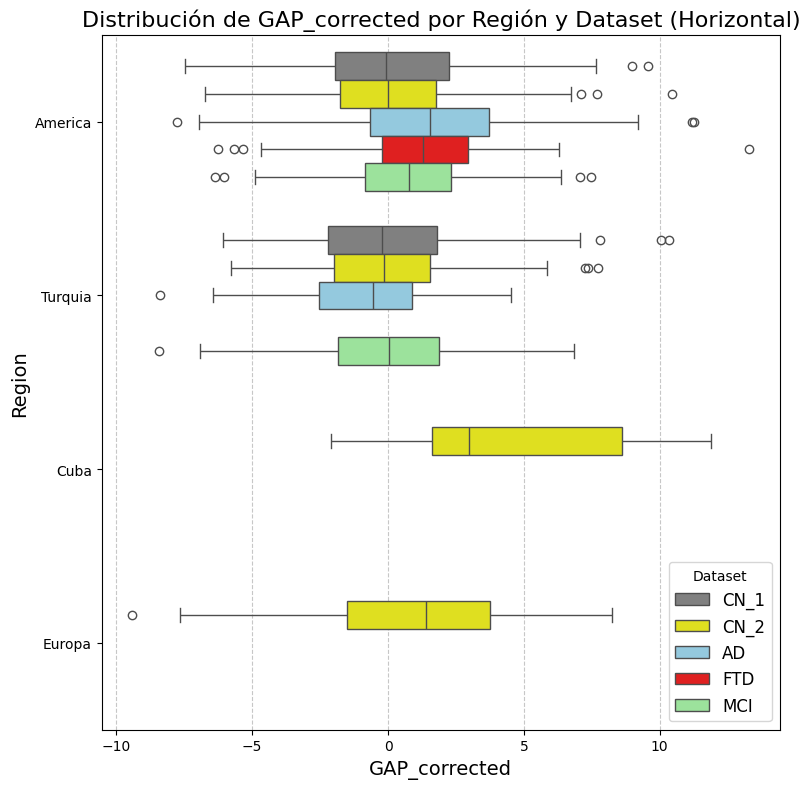

In [52]:


# Definir los datasets, etiquetas y colores personalizados
dataframes = [df_CN_1_combined, df_CN_2_combined, df_AD_combined, df_FTD_combined, df_MCI_combined]
labels = ["CN_1", "CN_2", "AD", "FTD", "MCI"]
variable = "GAP_corrected"
group_by = "Region"
colores_personalizados = ["gray", "yellow", "Skyblue", "red", "lightgreen"]  # Ejemplo de colores

# Llamar a la función
graficar_boxplot_horizontal(
    dataframes, 
    labels, 
    variable, 
    group_by, 
    colores_personalizados, 
    title="Distribución de GAP_corrected por Región y Dataset (Horizontal)"
)


In [209]:
shap_values_CN, shap_values_avg_CN, shap_summary_sorted_CN, shap_per_fold_CN = model_reg.calculate_multiple_shap(
    df_concatenado_CN, df_concatenado_CN,'ID_unique', results_per_fold_CN_train, results_per_fold_CN_test, results_model['model'],scaler=Scaler_reg_train
)

Importancia de características basada en suma de valores SHAP:
Low_subj_spec_RPD_HPC_right: 466.09823670564884
Alpha2_canon_EPP_PARIET_left: 465.75063402660004
IAF_ORB_left: 434.43412135583503
TF_INS_left: 361.5951810799306
Low_subj_spec_EPP_HPC_left: 321.00681245364365
Low_subj_spec_RPD_HPC_left: 268.43497214085494
TF_IFG_right: 239.85003318506807
Low_subj_spec_EPP_OCC_right: 226.38843288771588
Alpha2_canon_EPP_OCC_right: 218.4628277042979
TF_SFG_right: 188.9144425924902
IAF_INS_right: 188.05683159412803
Low_subj_spec_EPP_CING_right: 174.26020499025412
Alpha2_canon_EPP_PARIET_right: 173.31702853487633
IAF_INS_left: 171.92677681366413
High_subj_spec_EPP_CING_right: 169.40508246897457
Low_subj_spec_RPD_PARIET_left: 167.0333281620782
Low_subj_spec_EPP_PARIET_right: 157.09065641588097
TF_HPC_left: 154.13986907820654
Alpha2_canon_RPD_OCC_right: 137.7295262216358
TF_ORB_right: 125.31750390240505
Alpha2_canon_RPD_PARIET_right: 123.79553732865124
Low_subj_spec_EPP_CING_left: 113.5374830446250

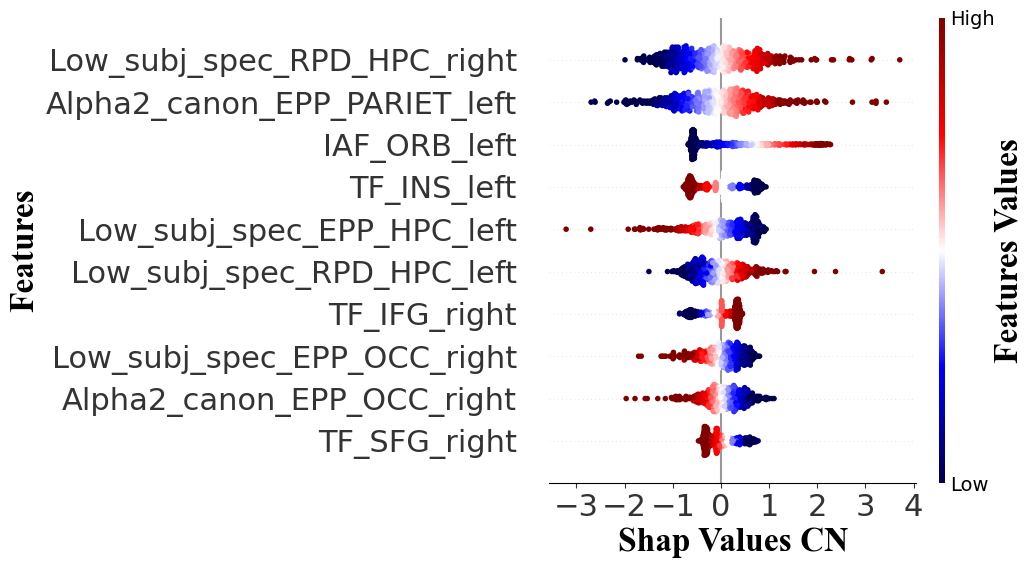

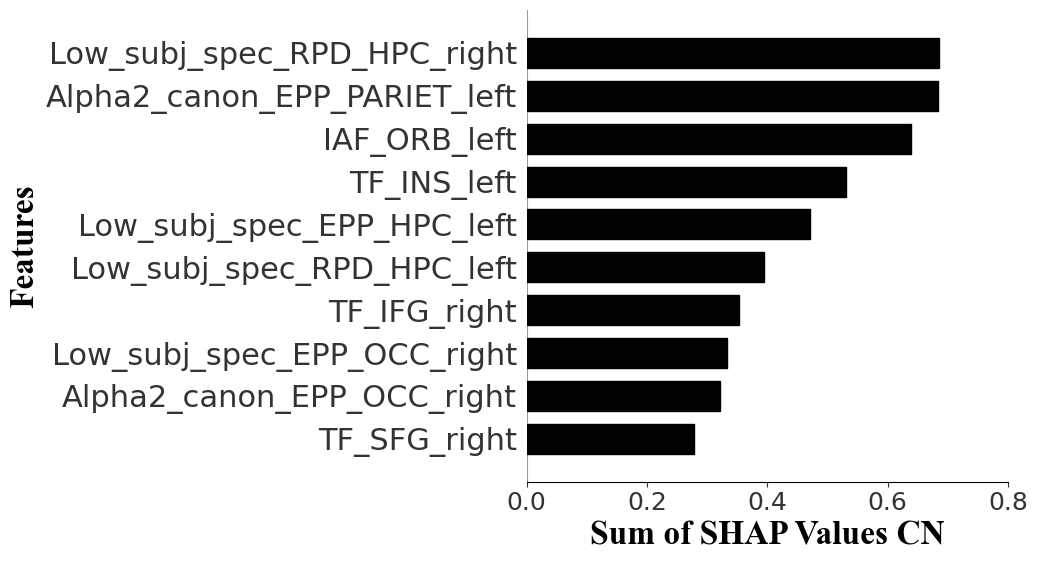

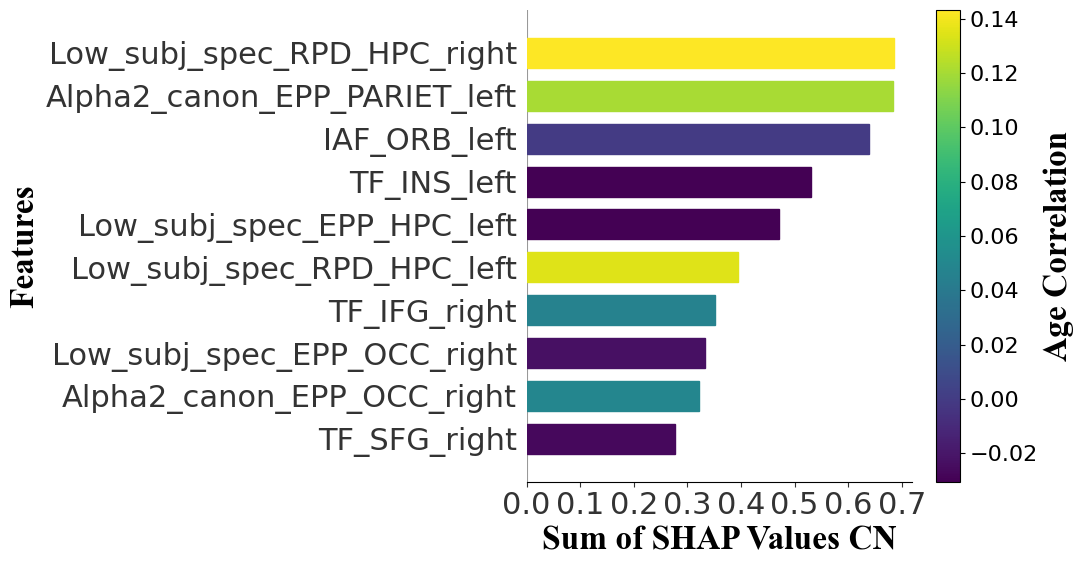

In [124]:
Plotters.plot_feature_importance(shap_values=shap_values_avg_CN,X_test=X_CN_1,y_test=y_CN_1, font= "Times New Roman", fontsize=24, xlabel1='Shap Values CN', xlabel2='Sum of SHAP Values CN',ylabel='Features', ylabel1='Features Values', ylabel2='Age Correlation', max_features=10)

In [125]:
shap_per_region_sorted_CN, normalized_result_sorted_CN=model_reg.shap_region(shap_summary_sorted=shap_summary_sorted_CN, num_max=20)

HPC_left: 1.000000
PARIET_left: 0.850995
OCC_right: 0.783479
INS_left: 0.717503
HPC_right: 0.626829
ORB_left: 0.584245
CING_right: 0.462176
PARIET_right: 0.444346
IFG_right: 0.322560
SFG_right: 0.254060
INS_right: 0.252907
ORB_right: 0.168532


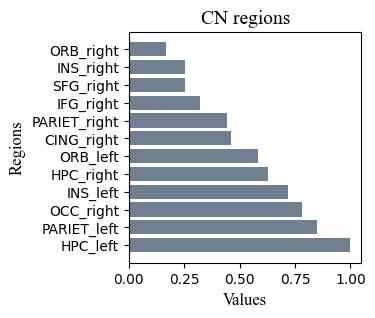

In [126]:
Plotters.plot_normalized_values(normalized_result_sorted_CN, color='slategray', name_set=f'CN regions',x_size=3,y_size=3,font='Times New Roman', fontsize=12, xlabel='Values', ylabel='Regions')

c:\python_env\brain_age_env\Lib\site-packages\nilearn\plotting\displays\_slicers.py:308: UserWarning: empty mask
  ims = self._map_show(img, type="imshow", threshold=threshold, **kwargs)


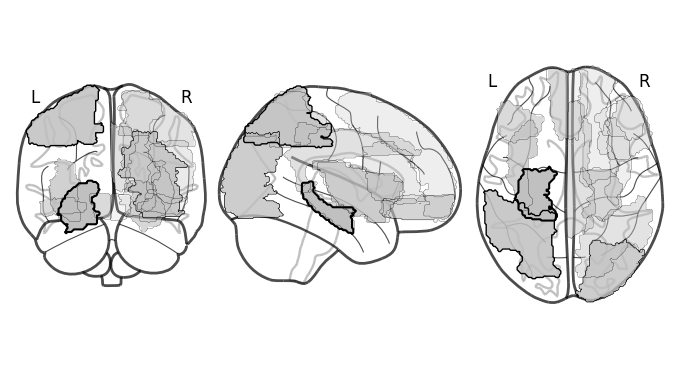

In [127]:
base_path = f'{path}cerebritos/'

Plotters.plot_brain_regions(normalized_result_sorted_CN, base_path, color='#C0C0C0')

In [128]:
import numpy as np
import pandas as pd

# Extraer coeficientes de los modelos y calcular el promedio en una sola línea
pesos_promedio = np.mean([modelo.coef_ for modelo in results_model['model']], axis=0)

# Crear el DataFrame y ordenarlo por magnitud de los pesos promedio
pesos_df = pd.DataFrame({
    'Característica': features,
    'Peso promedio': pesos_promedio
}).reindex(
    np.abs(pesos_promedio).argsort()[::-1]  # Ordenar por magnitud descendente
)

print(pesos_df)


                    Característica  Peso promedio
2     Alpha2_canon_EPP_PARIET_left       0.873507
39     Low_subj_spec_RPD_HPC_right       0.823739
58                    IAF_ORB_left       0.807378
30      Low_subj_spec_EPP_HPC_left      -0.594073
56                     TF_INS_left      -0.582733
..                             ...            ...
26  High_subj_spec_RPD_PARIET_left       0.000000
24    High_subj_spec_RPD_CING_left       0.000000
21    High_subj_spec_EPP_OCC_right       0.000000
20     High_subj_spec_EPP_OCC_left       0.000000
29    High_subj_spec_RPD_OCC_right       0.000000

[72 rows x 2 columns]


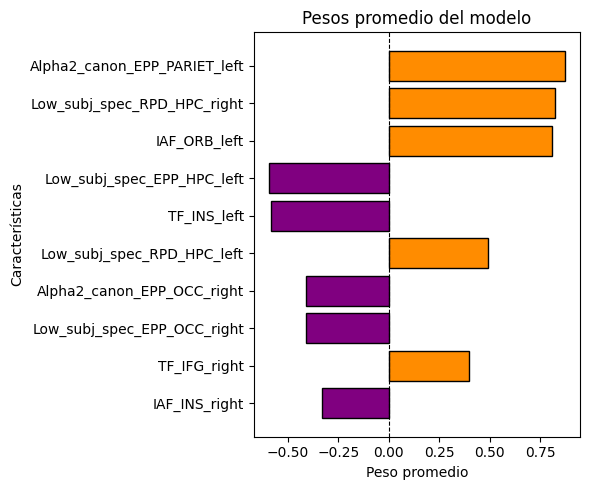

In [129]:
import matplotlib.pyplot as plt

# Seleccionar las 10 características principales
top_10 = pesos_df.head(10)

# Asignar colores según el signo del peso
colores = ['darkorange' if peso > 0 else 'purple' for peso in top_10['Peso promedio']]

# Crear el gráfico de barras
plt.figure(figsize=(6, 5))
plt.barh(
    top_10['Característica'], 
    top_10['Peso promedio'], 
    color=colores, 
    edgecolor='black'
)

# Personalizar el gráfico
plt.xlabel('Peso promedio')
plt.ylabel('Características')
plt.title('Pesos promedio del modelo')
plt.gca().invert_yaxis()  # Invertir el eje Y para que la característica más importante esté arriba
plt.axvline(0, color='black', linewidth=0.8, linestyle='--')  # Línea vertical en 0 para referencia
plt.tight_layout()

# Mostrar el gráfico
plt.show()


# America

In [130]:
# Definir las regiones para cada subconjunto
regiones_1 = ["America"]
regiones_2 = ["America", "Europa","Turquia", "Cuba"]

# Filtrar las filas del dataframe por región
df_CN_1 = df_CN_filtrado[df_CN_filtrado["Region"].isin(regiones_1)]
df_CN_2 = df_CN_filtrado[df_CN_filtrado["Region"].isin(regiones_2)]

# Seleccionar las columnas correspondientes para cada conjunto
X_CN_1 = df_CN_1[features]
y_CN_1 = df_CN_1["Age"]
ID_CN_1 = df_CN_1["ID_unique"]

X_CN_2 = df_CN_2[features]
y_CN_2 = df_CN_2["Age"]
ID_CN_2 = df_CN_2["ID_unique"]

scaler = StandardScaler()
scaler.fit(X_CN_1)

X_CN_1_scaled = scaler.transform(X_CN_1)
X_CN_1_scaled = pd.DataFrame(X_CN_1_scaled, columns=X_CN_1.columns)

df_concatenado_CN = pd.concat([X_CN_1, y_CN_1, ID_CN_1], axis=1, ignore_index=False)

In [131]:
opt_model, best_params = model_reg.search_best_model (X=X_CN_1_scaled, y=y_CN_1, n_iter_=50, scoring_metric='r2')


Fitting 10 folds for each of 1 candidates, totalling 10 fits
Fitting 10 folds for each of 1 candidates, totalling 10 fits
Fitting 10 folds for each of 1 candidates, totalling 10 fits
Fitting 10 folds for each of 1 candidates, totalling 10 fits
Fitting 10 folds for each of 1 candidates, totalling 10 fits
Fitting 10 folds for each of 1 candidates, totalling 10 fits
Fitting 10 folds for each of 1 candidates, totalling 10 fits
Fitting 10 folds for each of 1 candidates, totalling 10 fits
Fitting 10 folds for each of 1 candidates, totalling 10 fits
Fitting 10 folds for each of 1 candidates, totalling 10 fits
Fitting 10 folds for each of 1 candidates, totalling 10 fits
Fitting 10 folds for each of 1 candidates, totalling 10 fits
Fitting 10 folds for each of 1 candidates, totalling 10 fits
Fitting 10 folds for each of 1 candidates, totalling 10 fits
Fitting 10 folds for each of 1 candidates, totalling 10 fits
Fitting 10 folds for each of 1 candidates, totalling 10 fits
Fitting 10 folds for eac

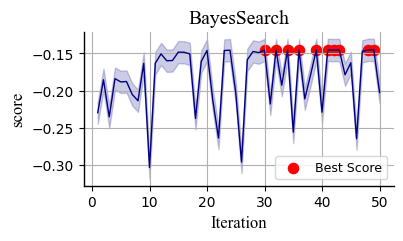

Top 1: Iteration 41, Score -0.14525597396334355
Top 2: Iteration 49, Score -0.14529082958728573
Top 3: Iteration 48, Score -0.14531412096985472
Top 4: Iteration 39, Score -0.14534198427671952
Top 5: Iteration 34, Score -0.14536690360513324
Top 6: Iteration 30, Score -0.14538628354613256
Top 7: Iteration 43, Score -0.1454247601142899
Top 8: Iteration 36, Score -0.14544409903154387
Top 9: Iteration 32, Score -0.1454608259668621
Top 10: Iteration 42, Score -0.14557933305427753


In [132]:
score = opt_model.cv_results_['mean_test_score'][:50]
Plotters.plot_iteration(y=score, title='BayesSearch', xlabel='Iteration', ylabel='score', legend_result=False, best_result=True, y_size=2, font='Times New Roman', weight='normal', mode=2, band_width=0.015)

In [133]:
best_params_ = model_reg.best_hyper(num_best=10, opt_model=opt_model, num_max=50)
best_params_

[{'alpha': 0.1,
  'l1_ratio': 0.42074931640276053,
  'max_iter': 10000,
  'tol': 1e-05},
 {'alpha': 0.1, 'l1_ratio': 0.392643550231196, 'max_iter': 7510, 'tol': 1e-05},
 {'alpha': 0.1,
  'l1_ratio': 0.3881623541244697,
  'max_iter': 7385,
  'tol': 1e-05},
 {'alpha': 0.1,
  'l1_ratio': 0.42777354039213367,
  'max_iter': 10000,
  'tol': 0.01},
 {'alpha': 0.1,
  'l1_ratio': 0.3445643371967956,
  'max_iter': 10000,
  'tol': 1e-05},
 {'alpha': 0.1,
  'l1_ratio': 0.3384879140051724,
  'max_iter': 10000,
  'tol': 1e-05},
 {'alpha': 0.1,
  'l1_ratio': 0.45108730106234546,
  'max_iter': 5182,
  'tol': 1e-05},
 {'alpha': 0.1,
  'l1_ratio': 0.4529135044874855,
  'max_iter': 10000,
  'tol': 1e-05},
 {'alpha': 0.1,
  'l1_ratio': 0.3596291915201077,
  'max_iter': 10000,
  'tol': 0.01},
 {'alpha': 0.1,
  'l1_ratio': 0.42543669043567534,
  'max_iter': 10000,
  'tol': 0.01}]

In [134]:
results_labels_df_CN_train, results_labels_df_CN_test,  results_model, results_per_fold_CN_train, results_per_fold_CN_test, df_CN_avg_train,df_CN_avg_test= model_reg.trainer(
        X=X_CN_1,
        y=y_CN_1,
        ID_label='ID_unique',
        ID=ID_CN_1,
        n_splits=10,
        n_iterations=20,
        params_=best_params_[0]
    )

C:\Users/felip/OneDrive - Universidad Técnica Federico Santa María/Documentos/Brain/Brain_Age_Clock/Base_Models\base_regressor.py:207: FutureWarning: The behavior of DataFrame concatenation with empty or all-NA entries is deprecated. In a future version, this will no longer exclude empty or all-NA columns when determining the result dtypes. To retain the old behavior, exclude the relevant entries before the concat operation.
  results_labels_df_train = pd.concat([results_labels_df_train, temp_df_train], ignore_index=True)
C:\Users/felip/OneDrive - Universidad Técnica Federico Santa María/Documentos/Brain/Brain_Age_Clock/Base_Models\base_regressor.py:209: FutureWarning: The behavior of DataFrame concatenation with empty or all-NA entries is deprecated. In a future version, this will no longer exclude empty or all-NA columns when determining the result dtypes. To retain the old behavior, exclude the relevant entries before the concat operation.
  results_labels_df_test = pd.concat([resul

                            OLS Regression Results                            
Dep. Variable:                 y_pred   R-squared:                       0.246
Model:                            OLS   Adj. R-squared:                  0.243
Method:                 Least Squares   F-statistic:                     77.46
Date:                Mon, 13 Jan 2025   Prob (F-statistic):           2.88e-16
Time:                        22:41:44   Log-Likelihood:                -600.85
No. Observations:                 239   AIC:                             1206.
Df Residuals:                     237   BIC:                             1213.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         53.0399      1.415     37.494      0.0

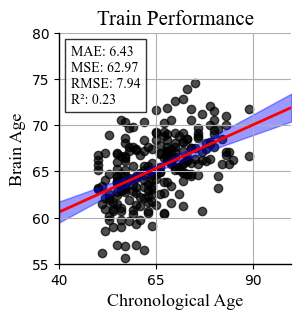

Error medio absoluto: 6.433930476643796
Error cuadrático medio: 62.96566246326387
Raíz del error cuadrático medio: 7.935090576878368
Coeficiente de determinación (R²): 0.23282511895548264


In [135]:
Plotters.plot_regresion(y=df_CN_avg_train['y_pred'],x= df_CN_avg_train['y_labels'], label_='Test Data',x_ticks_step=25,y_ticks_step=5,x_min_limit=40,y_min_limit=55,x_max_limit=100,y_max_limit=80,color='Black', title='Train Performance',line_ideal=False,confidence_interval=True,  alpha=0.7,xlabel='Chronological Age',ylabel='Brain Age',color_confidence_interval='blue',alpha_confidence_interval=0.4,color_line_fit='red', details=True, font='Times New Roman', weight='normal', x_size=3,y_size=3, legend=False, fontsize=13, mode=2)

In [136]:
results_labels_df_CN_2_test, results_per_fold_CN_2_test, df_CN_2_avg_test = model_reg.test(X=X_CN_2, y=y_CN_2, ID= ID_CN_2, ID_label='ID_unique', n_splits=10, n_iterations=20,result_model=results_model)
results_labels_df_AD_test, results_per_fold_AD_test, df_AD_avg_test = model_reg.test(X=X_AD, y=y_AD, ID= ID_AD, ID_label='ID_unique', n_splits=10, n_iterations=20,result_model=results_model)
results_labels_df_FTD_test, results_per_fold_FTD_test, df_FTD_avg_test = model_reg.test(X=X_FTD, y=y_FTD, ID= ID_FTD, ID_label='ID_unique', n_splits=10, n_iterations=20,result_model=results_model)
results_labels_df_MCI_test, results_per_fold_MCI_test, df_MCI_avg_test = model_reg.test(X=X_MCI, y=y_MCI, ID= ID_MCI, ID_label='ID_unique', n_splits=10, n_iterations=20,result_model=results_model)


C:\Users/felip/OneDrive - Universidad Técnica Federico Santa María/Documentos/Brain/Brain_Age_Clock/Base_Models\base_regressor.py:296: FutureWarning: The behavior of DataFrame concatenation with empty or all-NA entries is deprecated. In a future version, this will no longer exclude empty or all-NA columns when determining the result dtypes. To retain the old behavior, exclude the relevant entries before the concat operation.
  results_labels_df_test = pd.concat([results_labels_df_test, temp_pat_df], ignore_index=True)
C:\Users/felip/OneDrive - Universidad Técnica Federico Santa María/Documentos/Brain/Brain_Age_Clock/Base_Models\base_regressor.py:296: FutureWarning: The behavior of DataFrame concatenation with empty or all-NA entries is deprecated. In a future version, this will no longer exclude empty or all-NA columns when determining the result dtypes. To retain the old behavior, exclude the relevant entries before the concat operation.
  results_labels_df_test = pd.concat([results_l

In [137]:
df_CN_1_seleccion = df_CN_filtrado[['ID_unique', 'Country_unique','Region', 'Age', 'Sex', 'Educ', 'MMSE', 'HDI', 'GINI', 'ODQ']]
df_CN_1_combined = df_CN_avg_test.merge(df_CN_1_seleccion, on='ID_unique', how='left')

df_CN_2_seleccion = df_CN_filtrado[['ID_unique', 'Country_unique','Region', 'Age', 'Sex', 'Educ', 'MMSE', 'HDI', 'GINI', 'ODQ']]
df_CN_2_combined = df_CN_2_avg_test.merge(df_CN_2_seleccion, on='ID_unique', how='left')


df_AD_seleccion = df_AD_filtrado[['ID_unique', 'Country_unique','Region', 'Age', 'Sex', 'Educ', 'MMSE',  'GINI', 'ODQ']]
df_AD_combined = df_AD_avg_test.merge(df_AD_seleccion, on='ID_unique', how='left')

df_FTD_seleccion = df_FTD_filtrado[['ID_unique', 'Country_unique','Region', 'Age', 'Sex', 'Educ', 'MMSE', 'GINI', 'ODQ']]
df_FTD_combined = df_FTD_avg_test.merge(df_FTD_seleccion, on='ID_unique', how='left')

df_MCI_seleccion = df_MCI_filtrado[['ID_unique', 'Country_unique', 'Region','Age', 'Sex', 'Educ', 'MMSE',  'GINI', 'ODQ']]
df_MCI_combined = df_MCI_avg_test.merge(df_MCI_seleccion, on='ID_unique', how='left')



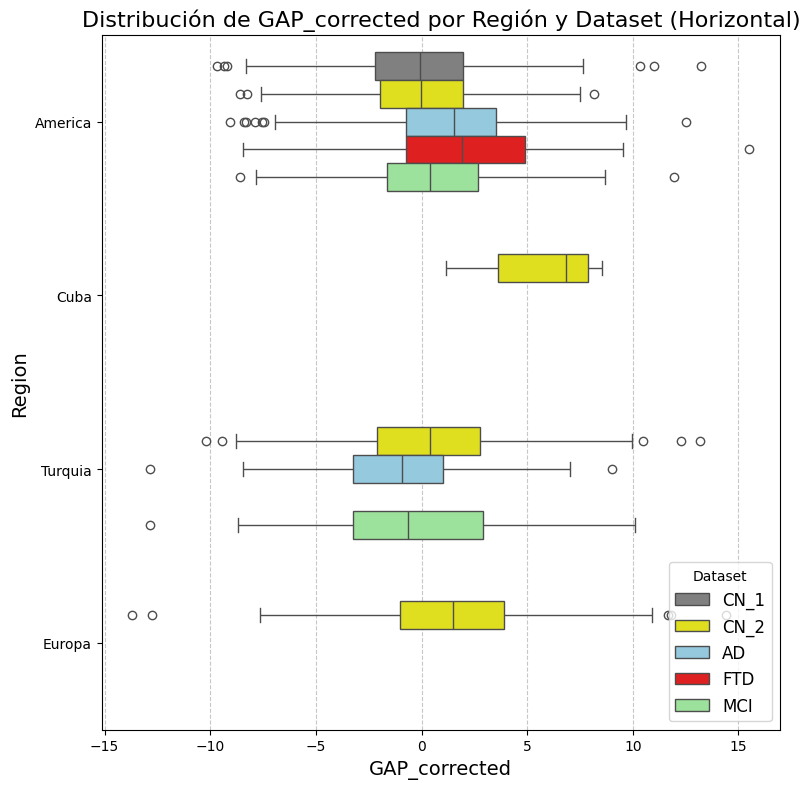

In [138]:
# Definir los datasets, etiquetas y colores personalizados
dataframes = [df_CN_1_combined, df_CN_2_combined, df_AD_combined, df_FTD_combined, df_MCI_combined]
labels = ["CN_1", "CN_2", "AD", "FTD", "MCI"]
variable = "GAP_corrected"
group_by = "Region"
colores_personalizados = ["gray", "yellow", "Skyblue", "red", "lightgreen"]  # Ejemplo de colores


# Llamar a la función
graficar_boxplot_horizontal(
    dataframes, 
    labels, 
    variable, 
    group_by, 
    colores_personalizados, 
    title="Distribución de GAP_corrected por Región y Dataset (Horizontal)"
)

In [139]:
shap_values_CN, shap_values_avg_CN, shap_summary_sorted_CN, shap_per_fold_CN = model_reg.calculate_multiple_shap(
    df_concatenado_CN, df_concatenado_CN,'ID_unique', results_per_fold_CN_train, results_per_fold_CN_test, results_model['model'],scaler=Scaler_reg_train
)

Importancia de características basada en suma de valores SHAP:
Alpha2_canon_RPD_CING_right: 345.59713287210775
TF_MFG_left: 256.63937196029184
TF_INS_left: 253.33428854752705
IAF_MFG_right: 220.86144091332687
Low_subj_spec_EPP_PARIET_left: 214.09052871470956
IAF_IFG_left: 209.35321270826117
High_subj_spec_EPP_CING_right: 209.31414621590764
High_subj_spec_RPD_CING_right: 209.3140361804655
TF_INS_right: 186.93479052438917
IAF_INS_right: 185.96431059249835
Alpha2_canon_RPD_PARIET_left: 184.12217478646807
Alpha2_canon_EPP_PARIET_left: 184.1219918572537
IAF_INS_left: 176.83671310853137
IAF_HPC_left: 165.90723374944974
TF_ORB_left: 164.13905775964702
Low_subj_spec_EPP_CING_right: 152.40491607944386
TF_IFG_right: 129.36285912963928
Low_subj_spec_EPP_OCC_right: 120.58331895577389
TF_MFG_right: 113.95899281455098
Low_subj_spec_RPD_HPC_left: 112.65814721258016
Low_subj_spec_EPP_HPC_left: 110.92261528821071
IAF_HPC_right: 105.95765803989542
Low_subj_spec_RPD_HPC_right: 104.52714318997033
TF_ORB_r

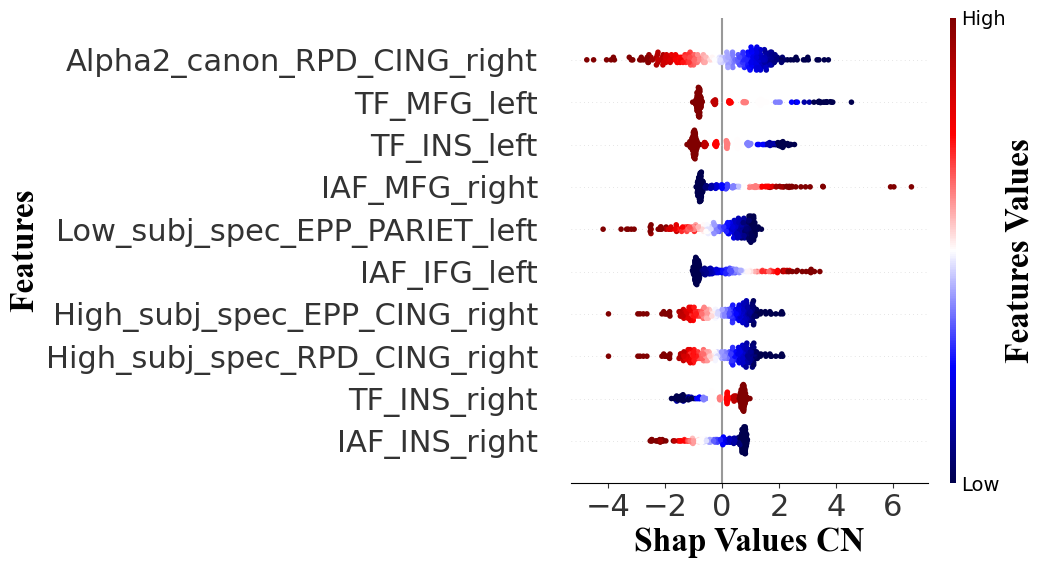

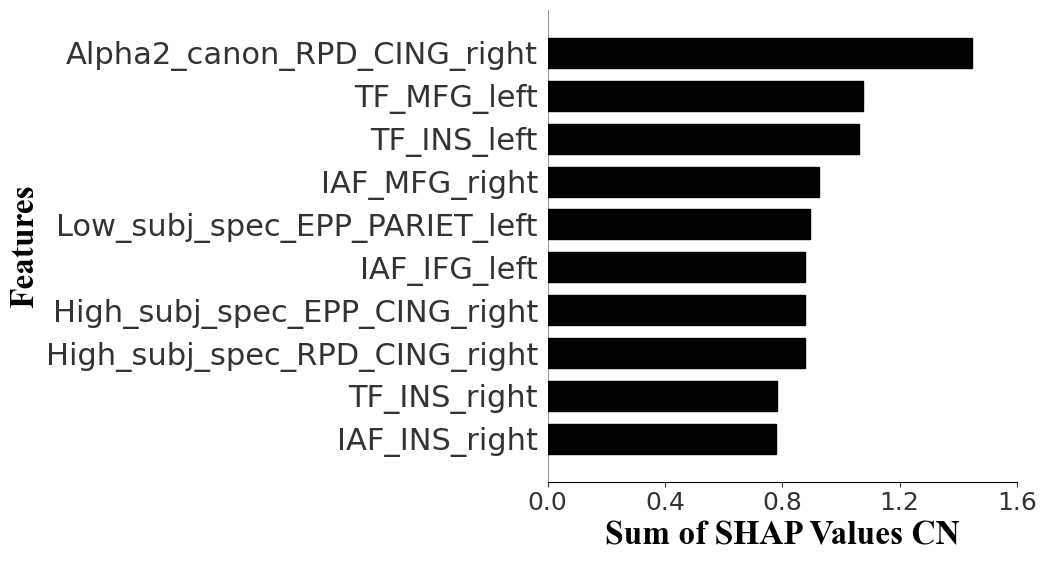

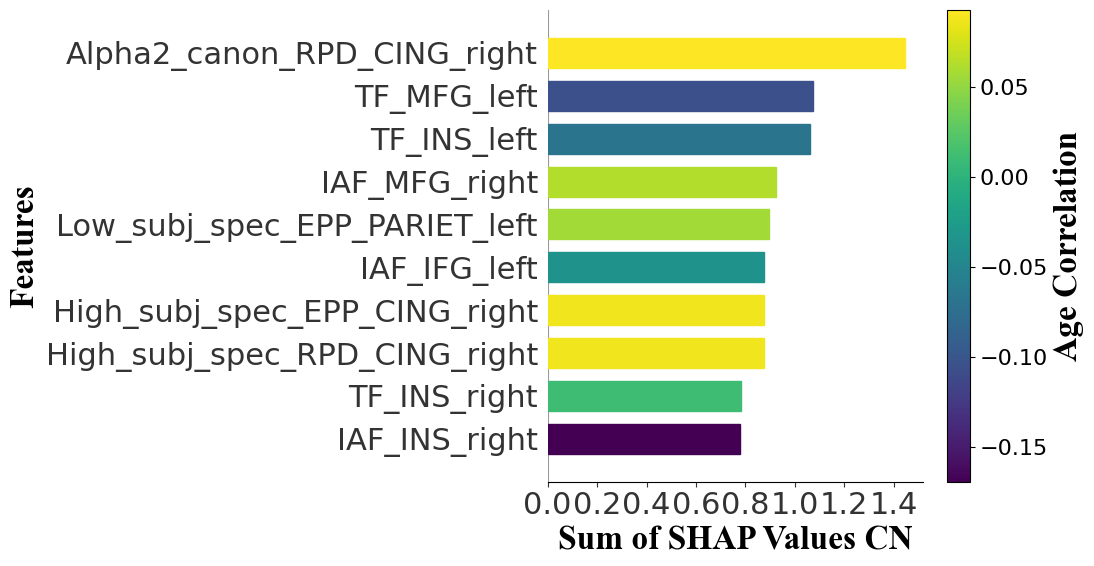

In [140]:
Plotters.plot_feature_importance(shap_values=shap_values_avg_CN,X_test=X_CN_1,y_test=y_CN_1, font= "Times New Roman", fontsize=24, xlabel1='Shap Values CN', xlabel2='Sum of SHAP Values CN',ylabel='Features', ylabel1='Features Values', ylabel2='Age Correlation', max_features=10)

In [141]:
shap_per_region_sorted_CN, normalized_result_sorted_CN=model_reg.shap_region(shap_summary_sorted=shap_summary_sorted_CN, num_max=20)

CING_right: 1.000000
PARIET_left: 0.635299
INS_left: 0.469296
INS_right: 0.406815
MFG_right: 0.365273
HPC_left: 0.303902
MFG_left: 0.279981
IFG_left: 0.228394
ORB_left: 0.179068
IFG_right: 0.141129
OCC_right: 0.131551


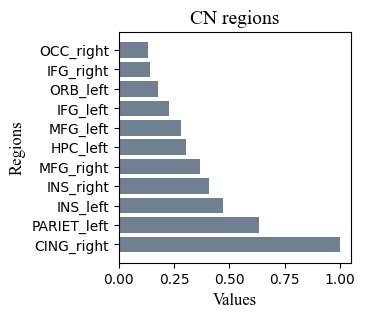

In [142]:
Plotters.plot_normalized_values(normalized_result_sorted_CN, color='slategray', name_set=f'CN regions',x_size=3,y_size=3,font='Times New Roman', fontsize=12, xlabel='Values', ylabel='Regions')

c:\python_env\brain_age_env\Lib\site-packages\nilearn\plotting\displays\_slicers.py:308: UserWarning: empty mask
  ims = self._map_show(img, type="imshow", threshold=threshold, **kwargs)


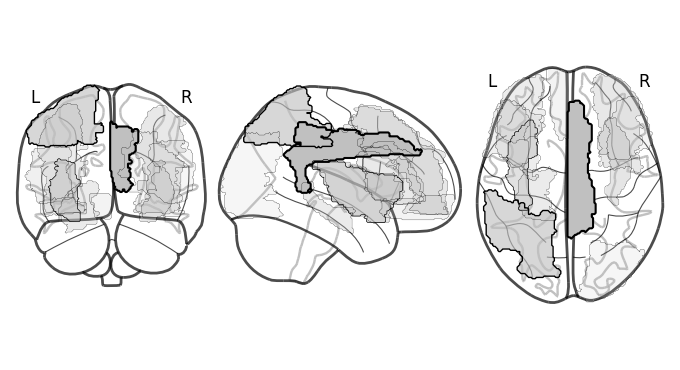

In [143]:
base_path = f'{path}cerebritos/'

Plotters.plot_brain_regions(normalized_result_sorted_CN, base_path, color='#C0C0C0')

In [144]:
import numpy as np
import pandas as pd

# Extraer coeficientes de los modelos y calcular el promedio en una sola línea
pesos_promedio = np.mean([modelo.coef_ for modelo in results_model['model']], axis=0)

# Crear el DataFrame y ordenarlo por magnitud de los pesos promedio
pesos_df = pd.DataFrame({
    'Característica': features,
    'Peso promedio': pesos_promedio
}).reindex(
    np.abs(pesos_promedio).argsort()[::-1]  # Ordenar por magnitud descendente
)

print(pesos_df)


                   Característica  Peso promedio
9     Alpha2_canon_RPD_CING_right      -1.675844
50                    TF_MFG_left      -1.328514
56                    TF_INS_left      -1.191424
63                  IAF_MFG_right       1.185247
34  Low_subj_spec_EPP_PARIET_left      -1.096506
..                            ...            ...
4       Alpha2_canon_EPP_OCC_left       0.011807
12      Alpha2_canon_RPD_OCC_left       0.011803
22    High_subj_spec_RPD_HPC_left       0.009066
14    High_subj_spec_EPP_HPC_left       0.009056
52                    TF_SFG_left      -0.007303

[72 rows x 2 columns]


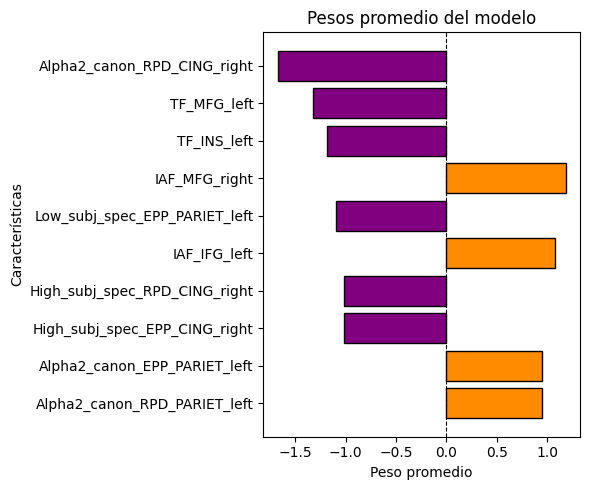

In [145]:
import matplotlib.pyplot as plt

# Seleccionar las 10 características principales
top_10 = pesos_df.head(10)

# Asignar colores según el signo del peso
colores = ['darkorange' if peso > 0 else 'purple' for peso in top_10['Peso promedio']]

# Crear el gráfico de barras
plt.figure(figsize=(6, 5))
plt.barh(
    top_10['Característica'], 
    top_10['Peso promedio'], 
    color=colores, 
    edgecolor='black'
)

# Personalizar el gráfico
plt.xlabel('Peso promedio')
plt.ylabel('Características')
plt.title('Pesos promedio del modelo')
plt.gca().invert_yaxis()  # Invertir el eje Y para que la característica más importante esté arriba
plt.axvline(0, color='black', linewidth=0.8, linestyle='--')  # Línea vertical en 0 para referencia
plt.tight_layout()

# Mostrar el gráfico
plt.show()


# Europa

In [166]:
# Definir las regiones para cada subconjunto
regiones_1 = ["Europa"]
regiones_2 = ["America", "Europa","Turquia", "Cuba"]

# Filtrar las filas del dataframe por región
df_CN_1 = df_CN_filtrado[df_CN_filtrado["Region"].isin(regiones_1)]
df_CN_2 = df_CN_filtrado[df_CN_filtrado["Region"].isin(regiones_2)]

# Seleccionar las columnas correspondientes para cada conjunto
X_CN_1 = df_CN_1[features]
y_CN_1 = df_CN_1["Age"]
ID_CN_1 = df_CN_1["ID_unique"]

X_CN_2 = df_CN_2[features]
y_CN_2 = df_CN_2["Age"]
ID_CN_2 = df_CN_2["ID_unique"]

scaler = StandardScaler()
scaler.fit(X_CN_1)

X_CN_1_scaled = scaler.transform(X_CN_1)
X_CN_1_scaled = pd.DataFrame(X_CN_1_scaled, columns=X_CN_1.columns)

df_concatenado_CN = pd.concat([X_CN_1, y_CN_1, ID_CN_1], axis=1, ignore_index=False)

In [175]:
df_CN_1

,Unnamed: 0,Delta_canon_EPP_ORB_left,Delta_canon_EPP_ORB_right,Delta_canon_EPP_IFG_left,Delta_canon_EPP_IFG_right,Delta_canon_EPP_MFG_left,Delta_canon_EPP_MFG_right,Delta_canon_EPP_SFG_left,Delta_canon_EPP_SFG_right,Delta_canon_EPP_HPC_left,...,Age,Sex,Educ,MMSE,HDI,GINI,ODQ,ID_unique,Country_unique,Region
175,377,0.043434,0.046927,0.031885,0.038624,0.033906,0.030505,0.034216,0.033564,0.029147,...,60.0,2.0,17.5,30.0,0.937,30.60,99.331301,375,Irlanda,Europa
176,378,0.041585,0.039013,0.037374,0.040285,0.033112,0.032064,0.041367,0.037127,0.039979,...,65.0,2.0,17.0,29.0,0.937,30.60,99.639228,376,Irlanda,Europa
177,379,0.060588,0.048056,0.043837,0.045655,0.040335,0.037414,0.043238,0.041015,0.076543,...,59.0,2.0,15.0,28.0,0.937,30.60,99.786585,377,Irlanda,Europa
178,380,0.030008,0.028765,0.027494,0.036870,0.026002,0.031223,0.031643,0.036522,0.030693,...,65.0,2.0,22.0,30.0,0.937,30.60,98.407520,378,Irlanda,Europa
179,381,0.035663,0.041238,0.026946,0.033531,0.028913,0.033224,0.033514,0.034445,0.032444,...,64.0,2.0,13.0,30.0,0.937,30.60,99.023374,379,Irlanda,Europa
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
527,877,0.041479,0.039124,0.035536,0.030693,0.033350,0.036594,0.035645,0.033657,0.027512,...,81.0,NaN,10.0,NaN,0.924,33.14,96.917794,849,Reino Unido,Europa
528,878,0.055439,0.058002,0.046836,0.045891,0.042593,0.036586,0.040759,0.038291,0.039591,...,69.0,NaN,16.0,NaN,0.924,33.14,93.941941,850,Reino Unido,Europa
529,879,0.046979,0.044767,0.041845,0.043328,0.034180,0.034388,0.037582,0.036911,0.034703,...,78.0,NaN,19.0,NaN,0.924,33.14,96.826635,851,Reino Unido,Europa
530,880,0.041625,0.034800,0.037624,0.034572,0.042909,0.036453,0.036287,0.031333,0.030704,...,75.0,NaN,16.0,NaN,0.924,33.14,95.332631,852,Reino Unido,Europa


In [167]:
opt_model, best_params = model_reg.search_best_model (X=X_CN_1_scaled, y=y_CN_1, n_iter_=50, scoring_metric='r2')


Fitting 10 folds for each of 1 candidates, totalling 10 fits
Fitting 10 folds for each of 1 candidates, totalling 10 fits
Fitting 10 folds for each of 1 candidates, totalling 10 fits
Fitting 10 folds for each of 1 candidates, totalling 10 fits
Fitting 10 folds for each of 1 candidates, totalling 10 fits
Fitting 10 folds for each of 1 candidates, totalling 10 fits
Fitting 10 folds for each of 1 candidates, totalling 10 fits
Fitting 10 folds for each of 1 candidates, totalling 10 fits
Fitting 10 folds for each of 1 candidates, totalling 10 fits
Fitting 10 folds for each of 1 candidates, totalling 10 fits
Fitting 10 folds for each of 1 candidates, totalling 10 fits
Fitting 10 folds for each of 1 candidates, totalling 10 fits
Fitting 10 folds for each of 1 candidates, totalling 10 fits
Fitting 10 folds for each of 1 candidates, totalling 10 fits
Fitting 10 folds for each of 1 candidates, totalling 10 fits
Fitting 10 folds for each of 1 candidates, totalling 10 fits
Fitting 10 folds for eac

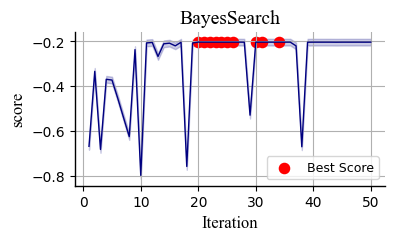

Top 1: Iteration 20, Score -0.203021512310057
Top 2: Iteration 34, Score -0.20307298566998178
Top 3: Iteration 21, Score -0.20310332289358643
Top 4: Iteration 22, Score -0.20314106859115216
Top 5: Iteration 23, Score -0.20316423748567658
Top 6: Iteration 31, Score -0.20317822431500074
Top 7: Iteration 24, Score -0.20317913078815045
Top 8: Iteration 30, Score -0.20318619359549786
Top 9: Iteration 25, Score -0.20318850053949356
Top 10: Iteration 26, Score -0.20318866770036376


In [168]:
score = opt_model.cv_results_['mean_test_score'][:50]
Plotters.plot_iteration(y=score, title='BayesSearch', xlabel='Iteration', ylabel='score', legend_result=False, best_result=True, y_size=2, font='Times New Roman', weight='normal', mode=2, band_width=0.015)

In [169]:
best_params_ = model_reg.best_hyper(num_best=10, opt_model=opt_model, num_max=50)
best_params_

[{'alpha': 0.1,
  'l1_ratio': 0.9101144503222549,
  'max_iter': 10000,
  'tol': 1e-05},
 {'alpha': 0.1,
  'l1_ratio': 0.9052479719497896,
  'max_iter': 10000,
  'tol': 1e-05},
 {'alpha': 0.1,
  'l1_ratio': 0.902409758266985,
  'max_iter': 10000,
  'tol': 1e-05},
 {'alpha': 0.1,
  'l1_ratio': 0.8992711152964687,
  'max_iter': 10000,
  'tol': 1e-05},
 {'alpha': 0.1,
  'l1_ratio': 0.8974436956687808,
  'max_iter': 10000,
  'tol': 1e-05},
 {'alpha': 0.1,
  'l1_ratio': 0.8963447183110516,
  'max_iter': 10000,
  'tol': 1e-05},
 {'alpha': 0.1,
  'l1_ratio': 0.8962738616878804,
  'max_iter': 10000,
  'tol': 1e-05},
 {'alpha': 0.1,
  'l1_ratio': 0.8957206637464772,
  'max_iter': 10000,
  'tol': 1e-05},
 {'alpha': 0.1,
  'l1_ratio': 0.8955399250118281,
  'max_iter': 10000,
  'tol': 1e-05},
 {'alpha': 0.1,
  'l1_ratio': 0.8955271754970688,
  'max_iter': 10000,
  'tol': 1e-05}]

In [170]:
results_labels_df_CN_train, results_labels_df_CN_test,  results_model, results_per_fold_CN_train, results_per_fold_CN_test, df_CN_avg_train,df_CN_avg_test= model_reg.trainer(
        X=X_CN_1,
        y=y_CN_1,
        ID_label='ID_unique',
        ID=ID_CN_1,
        n_splits=10,
        n_iterations=20,
        params_=best_params_[0]
    )

C:\Users/felip/OneDrive - Universidad Técnica Federico Santa María/Documentos/Brain/Brain_Age_Clock/Base_Models\base_regressor.py:207: FutureWarning: The behavior of DataFrame concatenation with empty or all-NA entries is deprecated. In a future version, this will no longer exclude empty or all-NA columns when determining the result dtypes. To retain the old behavior, exclude the relevant entries before the concat operation.
  results_labels_df_train = pd.concat([results_labels_df_train, temp_df_train], ignore_index=True)
C:\Users/felip/OneDrive - Universidad Técnica Federico Santa María/Documentos/Brain/Brain_Age_Clock/Base_Models\base_regressor.py:209: FutureWarning: The behavior of DataFrame concatenation with empty or all-NA entries is deprecated. In a future version, this will no longer exclude empty or all-NA columns when determining the result dtypes. To retain the old behavior, exclude the relevant entries before the concat operation.
  results_labels_df_test = pd.concat([resul

                            OLS Regression Results                            
Dep. Variable:                 y_pred   R-squared:                       0.310
Model:                            OLS   Adj. R-squared:                  0.306
Method:                 Least Squares   F-statistic:                     80.28
Date:                Mon, 13 Jan 2025   Prob (F-statistic):           4.20e-16
Time:                        22:52:21   Log-Likelihood:                -400.92
No. Observations:                 181   AIC:                             805.8
Df Residuals:                     179   BIC:                             812.2
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         52.6119      1.654     31.809      0.0

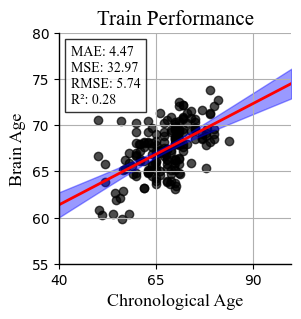

Error medio absoluto: 4.470067721161514
Error cuadrático medio: 32.97453938552806
Raíz del error cuadrático medio: 5.742346156888146
Coeficiente de determinación (R²): 0.2830367205182984


In [171]:
Plotters.plot_regresion(y=df_CN_avg_train['y_pred'],x= df_CN_avg_train['y_labels'], label_='Test Data',x_ticks_step=25,y_ticks_step=5,x_min_limit=40,y_min_limit=55,x_max_limit=100,y_max_limit=80,color='Black', title='Train Performance',line_ideal=False,confidence_interval=True,  alpha=0.7,xlabel='Chronological Age',ylabel='Brain Age',color_confidence_interval='blue',alpha_confidence_interval=0.4,color_line_fit='red', details=True, font='Times New Roman', weight='normal', x_size=3,y_size=3, legend=False, fontsize=13, mode=2)

In [172]:
results_labels_df_CN_2_test, results_per_fold_CN_2_test, df_CN_2_avg_test = model_reg.test(X=X_CN_2, y=y_CN_2, ID= ID_CN_2, ID_label='ID_unique', n_splits=10, n_iterations=20,result_model=results_model)
results_labels_df_AD_test, results_per_fold_AD_test, df_AD_avg_test = model_reg.test(X=X_AD, y=y_AD, ID= ID_AD, ID_label='ID_unique', n_splits=10, n_iterations=20,result_model=results_model)
results_labels_df_FTD_test, results_per_fold_FTD_test, df_FTD_avg_test = model_reg.test(X=X_FTD, y=y_FTD, ID= ID_FTD, ID_label='ID_unique', n_splits=10, n_iterations=20,result_model=results_model)
results_labels_df_MCI_test, results_per_fold_MCI_test, df_MCI_avg_test = model_reg.test(X=X_MCI, y=y_MCI, ID= ID_MCI, ID_label='ID_unique', n_splits=10, n_iterations=20,result_model=results_model)


C:\Users/felip/OneDrive - Universidad Técnica Federico Santa María/Documentos/Brain/Brain_Age_Clock/Base_Models\base_regressor.py:296: FutureWarning: The behavior of DataFrame concatenation with empty or all-NA entries is deprecated. In a future version, this will no longer exclude empty or all-NA columns when determining the result dtypes. To retain the old behavior, exclude the relevant entries before the concat operation.
  results_labels_df_test = pd.concat([results_labels_df_test, temp_pat_df], ignore_index=True)
C:\Users/felip/OneDrive - Universidad Técnica Federico Santa María/Documentos/Brain/Brain_Age_Clock/Base_Models\base_regressor.py:296: FutureWarning: The behavior of DataFrame concatenation with empty or all-NA entries is deprecated. In a future version, this will no longer exclude empty or all-NA columns when determining the result dtypes. To retain the old behavior, exclude the relevant entries before the concat operation.
  results_labels_df_test = pd.concat([results_l

In [177]:
df_CN_1_seleccion = df_CN_filtrado[['ID_unique', 'Country_unique','Region', 'Age', 'Sex', 'Educ', 'MMSE', 'HDI', 'GINI', 'ODQ']]
df_CN_1_combined = df_CN_avg_test.merge(df_CN_1_seleccion, on='ID_unique', how='left')

df_CN_2_seleccion = df_CN_filtrado[['ID_unique', 'Country_unique','Region', 'Age', 'Sex', 'Educ', 'MMSE', 'HDI', 'GINI', 'ODQ']]
df_CN_2_combined = df_CN_2_avg_test.merge(df_CN_2_seleccion, on='ID_unique', how='left')


df_AD_seleccion = df_AD_filtrado[['ID_unique', 'Country_unique','Region', 'Age', 'Sex', 'Educ', 'MMSE',  'GINI', 'ODQ']]
df_AD_combined = df_AD_avg_test.merge(df_AD_seleccion, on='ID_unique', how='left')

df_FTD_seleccion = df_FTD_filtrado[['ID_unique', 'Country_unique','Region', 'Age', 'Sex', 'Educ', 'MMSE', 'GINI', 'ODQ']]
df_FTD_combined = df_FTD_avg_test.merge(df_FTD_seleccion, on='ID_unique', how='left')

df_MCI_seleccion = df_MCI_filtrado[['ID_unique', 'Country_unique', 'Region','Age', 'Sex', 'Educ', 'MMSE',  'GINI', 'ODQ']]
df_MCI_combined = df_MCI_avg_test.merge(df_MCI_seleccion, on='ID_unique', how='left')

df_CN_1_combined

,ID_unique,y_labels,y_pred,y_pred_corrected,GAP,GAP_corrected,Country_unique,Region,Age,Sex,Educ,MMSE,HDI,GINI,ODQ
0,375,60.0,69.580436,63.763853,9.580436,3.763853,Irlanda,Europa,60.0,2.0,17.5,30.0,0.937,30.60,99.331301
1,376,65.0,63.533037,61.659433,-1.466963,-3.340567,Irlanda,Europa,65.0,2.0,17.0,29.0,0.937,30.60,99.639228
2,377,59.0,67.829850,61.219190,8.829850,2.219190,Irlanda,Europa,59.0,2.0,15.0,28.0,0.937,30.60,99.786585
3,378,65.0,64.144432,62.365738,-0.855568,-2.634262,Irlanda,Europa,65.0,2.0,22.0,30.0,0.937,30.60,98.407520
4,379,64.0,69.130985,66.505281,5.130985,2.505281,Irlanda,Europa,64.0,2.0,13.0,30.0,0.937,30.60,99.023374
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
176,849,81.0,71.468500,82.350400,-9.531500,1.350400,Reino Unido,Europa,81.0,NaN,10.0,NaN,0.924,33.14,96.917794
177,850,69.0,69.257583,70.553933,0.257583,1.553933,Reino Unido,Europa,69.0,NaN,16.0,NaN,0.924,33.14,93.941941
178,851,78.0,63.206797,71.376893,-14.793203,-6.623107,Reino Unido,Europa,78.0,NaN,19.0,NaN,0.924,33.14,96.826635
179,852,75.0,68.211165,74.108681,-6.788835,-0.891319,Reino Unido,Europa,75.0,NaN,16.0,NaN,0.924,33.14,95.332631


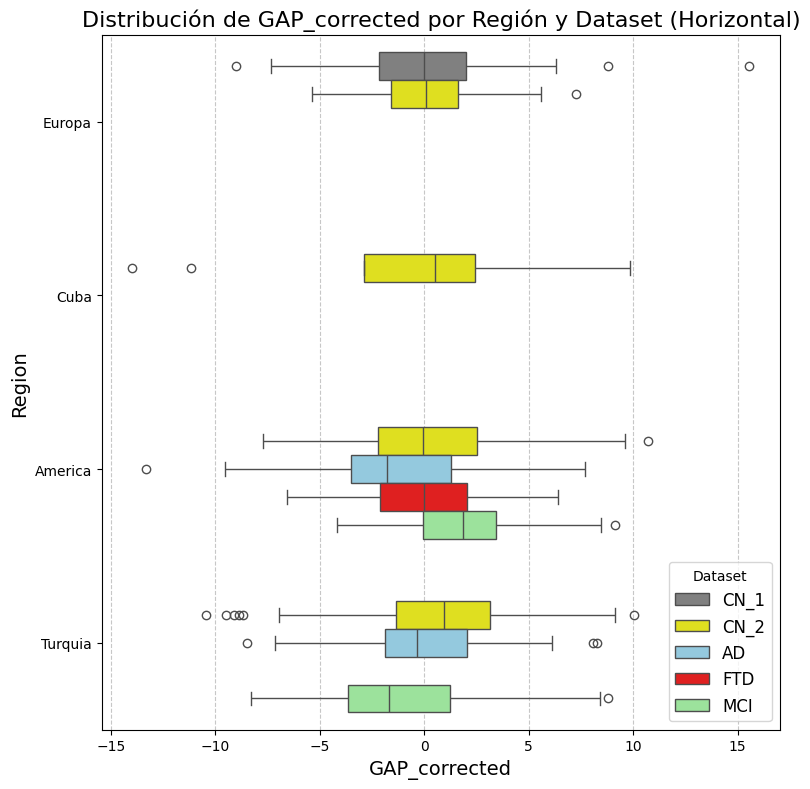

In [178]:
# Definir los datasets, etiquetas y colores personalizados
dataframes = [df_CN_1_combined, df_CN_2_combined, df_AD_combined, df_FTD_combined, df_MCI_combined]
labels = ["CN_1", "CN_2", "AD", "FTD", "MCI"]
variable = "GAP_corrected"
group_by = "Region"
colores_personalizados = ["gray", "yellow", "Skyblue", "red", "lightgreen"]  # Ejemplo de colores


# Llamar a la función
graficar_boxplot_horizontal(
    dataframes, 
    labels, 
    variable, 
    group_by, 
    colores_personalizados, 
    title="Distribución de GAP_corrected por Región y Dataset (Horizontal)"
)

In [179]:
shap_values_CN, shap_values_avg_CN, shap_summary_sorted_CN, shap_per_fold_CN = model_reg.calculate_multiple_shap(
    df_concatenado_CN, df_concatenado_CN,'ID_unique', results_per_fold_CN_train, results_per_fold_CN_test, results_model['model'],scaler=Scaler_reg_train
)

Importancia de características basada en suma de valores SHAP:
Low_subj_spec_RPD_PARIET_left: 272.5844117577206
Low_subj_spec_EPP_PARIET_right: 227.06010673946724
IAF_INS_right: 224.33097588890982
Alpha2_canon_RPD_PARIET_right: 163.54305211914922
Alpha2_canon_EPP_PARIET_right: 163.52790422203344
TF_ORB_right: 118.06762002320008
Low_subj_spec_RPD_CING_right: 116.14231518804696
Alpha2_canon_RPD_OCC_left: 114.59096982271953
Alpha2_canon_EPP_OCC_left: 114.5478567546687
TF_SFG_left: 101.50197984864681
Alpha2_canon_RPD_PARIET_left: 94.4053952893486
Alpha2_canon_EPP_PARIET_left: 94.31008562818982
TF_MFG_right: 93.97781834005839
Alpha2_canon_RPD_OCC_right: 87.99304788544516
Alpha2_canon_EPP_OCC_right: 87.87153677985029
TF_SFG_right: 79.89872442838028
TF_IFG_right: 75.36807365604679
Low_subj_spec_RPD_HPC_left: 73.20190238035731
IAF_SFG_right: 65.46146398015746
Alpha2_canon_EPP_HPC_right: 64.47109232034485
Alpha2_canon_RPD_HPC_right: 64.32577073480495
IAF_SFG_left: 57.99634126614561
Low_subj_spe

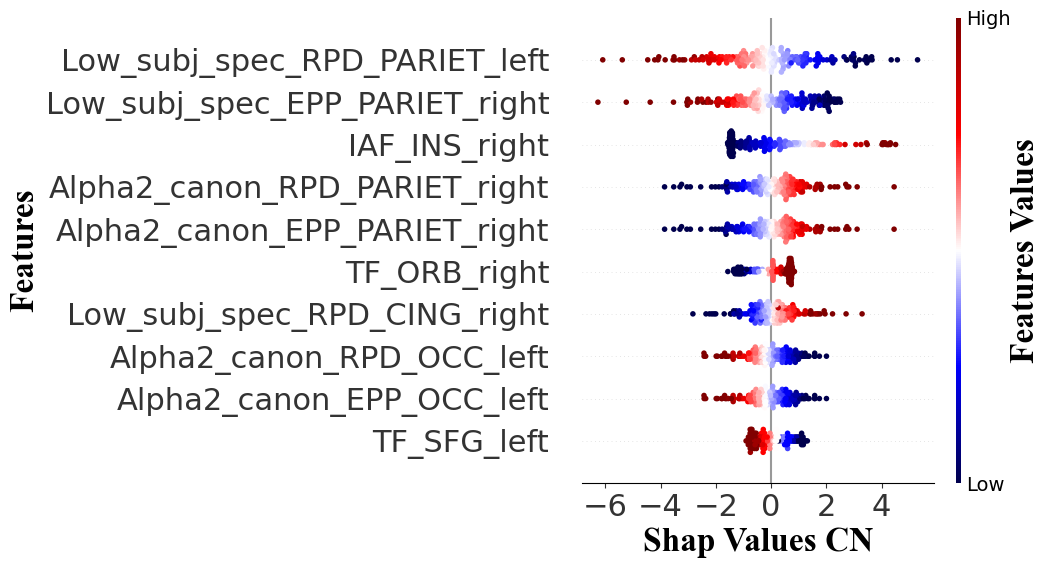

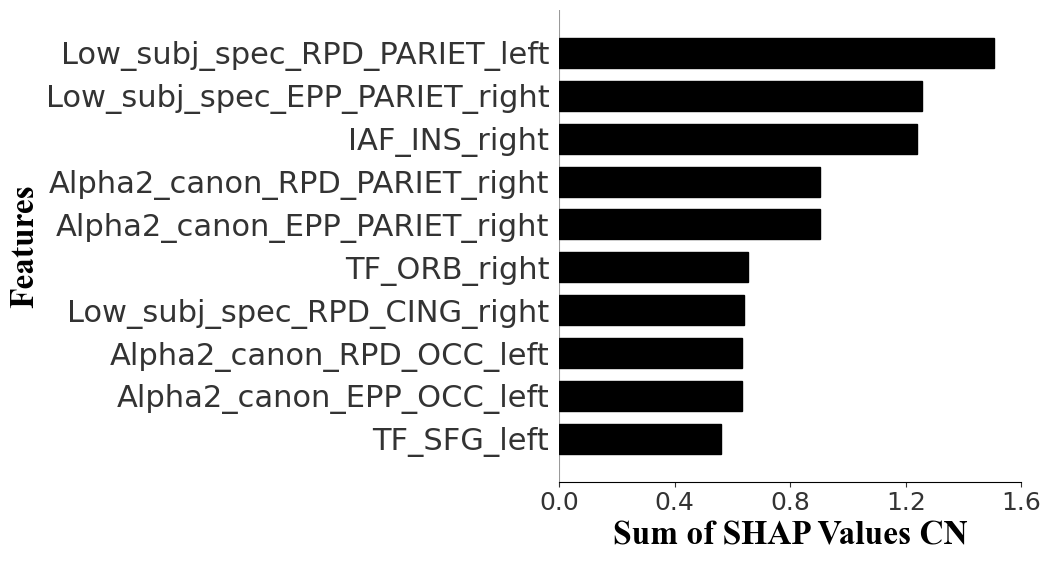

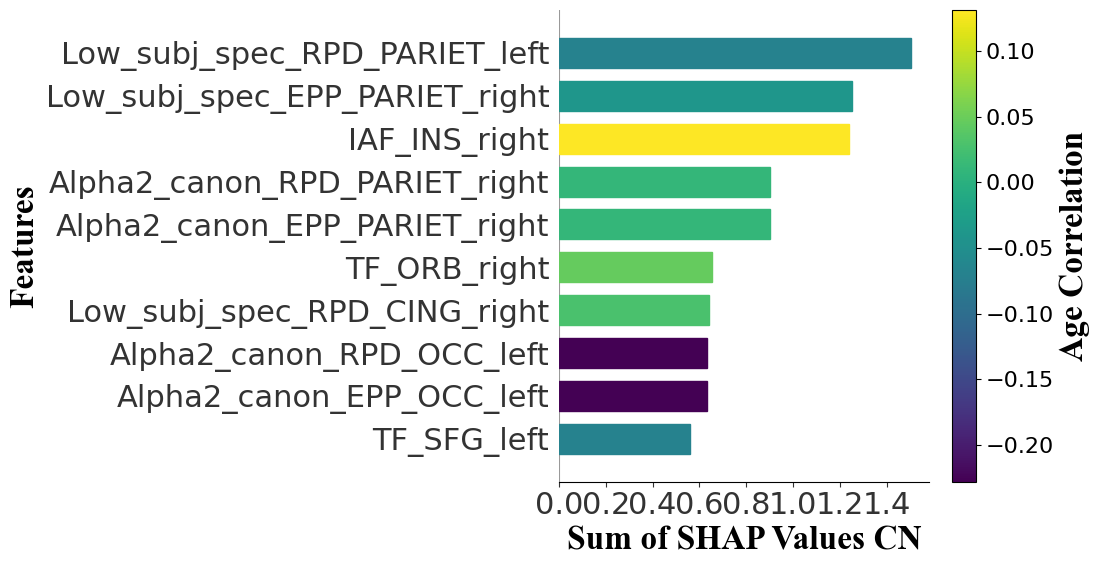

In [180]:
Plotters.plot_feature_importance(shap_values=shap_values_avg_CN,X_test=X_CN_1,y_test=y_CN_1, font= "Times New Roman", fontsize=24, xlabel1='Shap Values CN', xlabel2='Sum of SHAP Values CN',ylabel='Features', ylabel1='Features Values', ylabel2='Age Correlation', max_features=10)

In [181]:
shap_per_region_sorted_CN, normalized_result_sorted_CN=model_reg.shap_region(shap_summary_sorted=shap_summary_sorted_CN, num_max=20)

PARIET_right: 1.000000
PARIET_left: 0.832474
OCC_left: 0.413510
INS_right: 0.404834
OCC_right: 0.317370
SFG_right: 0.262321
ORB_right: 0.213068
CING_right: 0.209594
SFG_left: 0.183173
MFG_right: 0.169595
IFG_right: 0.136011
HPC_left: 0.132102
HPC_right: 0.116346


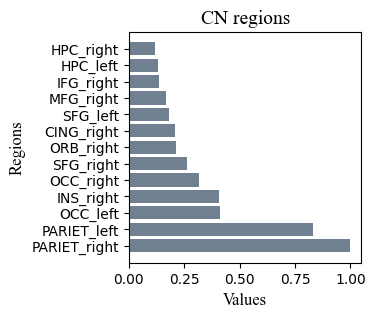

In [182]:
Plotters.plot_normalized_values(normalized_result_sorted_CN, color='slategray', name_set=f'CN regions',x_size=3,y_size=3,font='Times New Roman', fontsize=12, xlabel='Values', ylabel='Regions')

c:\python_env\brain_age_env\Lib\site-packages\nilearn\plotting\displays\_slicers.py:308: UserWarning: empty mask
  ims = self._map_show(img, type="imshow", threshold=threshold, **kwargs)


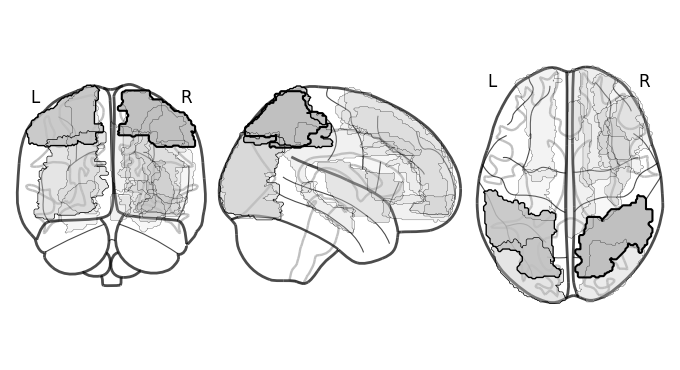

In [162]:
base_path = f'{path}cerebritos/'

Plotters.plot_brain_regions(normalized_result_sorted_CN, base_path, color='#C0C0C0')

In [163]:
import numpy as np
import pandas as pd

# Extraer coeficientes de los modelos y calcular el promedio en una sola línea
pesos_promedio = np.mean([modelo.coef_ for modelo in results_model['model']], axis=0)

# Crear el DataFrame y ordenarlo por magnitud de los pesos promedio
pesos_df = pd.DataFrame({
    'Característica': features,
    'Peso promedio': pesos_promedio
}).reindex(
    np.abs(pesos_promedio).argsort()[::-1]  # Ordenar por magnitud descendente
)

print(pesos_df)


                    Característica  Peso promedio
42   Low_subj_spec_RPD_PARIET_left      -1.970923
69                   IAF_INS_right       1.587410
35  Low_subj_spec_EPP_PARIET_right      -1.511618
11   Alpha2_canon_RPD_PARIET_right       1.190707
3    Alpha2_canon_EPP_PARIET_right       1.190618
..                             ...            ...
43  Low_subj_spec_RPD_PARIET_right       0.000389
28     High_subj_spec_RPD_OCC_left      -0.000111
20     High_subj_spec_EPP_OCC_left      -0.000109
18  High_subj_spec_EPP_PARIET_left       0.000000
26  High_subj_spec_RPD_PARIET_left       0.000000

[72 rows x 2 columns]


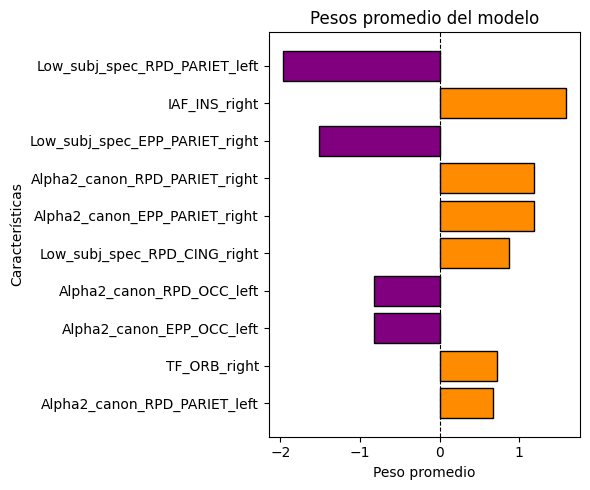

In [164]:
import matplotlib.pyplot as plt

# Seleccionar las 10 características principales
top_10 = pesos_df.head(10)

# Asignar colores según el signo del peso
colores = ['darkorange' if peso > 0 else 'purple' for peso in top_10['Peso promedio']]

# Crear el gráfico de barras
plt.figure(figsize=(6, 5))
plt.barh(
    top_10['Característica'], 
    top_10['Peso promedio'], 
    color=colores, 
    edgecolor='black'
)

# Personalizar el gráfico
plt.xlabel('Peso promedio')
plt.ylabel('Características')
plt.title('Pesos promedio del modelo')
plt.gca().invert_yaxis()  # Invertir el eje Y para que la característica más importante esté arriba
plt.axvline(0, color='black', linewidth=0.8, linestyle='--')  # Línea vertical en 0 para referencia
plt.tight_layout()

# Mostrar el gráfico
plt.show()


# turquia

In [211]:
# Definir las regiones para cada subconjunto
regiones_1 = ["Turquia"]
regiones_2 = ["America", "Europa","Turquia", "Cuba"]

# Filtrar las filas del dataframe por región
df_CN_1 = df_CN_filtrado[df_CN_filtrado["Region"].isin(regiones_1)]
df_CN_2 = df_CN_filtrado[df_CN_filtrado["Region"].isin(regiones_2)]

# Seleccionar las columnas correspondientes para cada conjunto
X_CN_1 = df_CN_1[features]
y_CN_1 = df_CN_1["Age"]
ID_CN_1 = df_CN_1["ID_unique"]

X_CN_2 = df_CN_2[features]
y_CN_2 = df_CN_2["Age"]
ID_CN_2 = df_CN_2["ID_unique"]

scaler = StandardScaler()
scaler.fit(X_CN_1)

X_CN_1_scaled = scaler.transform(X_CN_1)
X_CN_1_scaled = pd.DataFrame(X_CN_1_scaled, columns=X_CN_1.columns)

df_concatenado_CN = pd.concat([X_CN_1, y_CN_1, ID_CN_1], axis=1, ignore_index=False)

In [212]:
opt_model, best_params = model_reg.search_best_model (X=X_CN_1_scaled, y=y_CN_1, n_iter_=50, scoring_metric='r2')


Fitting 10 folds for each of 1 candidates, totalling 10 fits
Fitting 10 folds for each of 1 candidates, totalling 10 fits
Fitting 10 folds for each of 1 candidates, totalling 10 fits
Fitting 10 folds for each of 1 candidates, totalling 10 fits
Fitting 10 folds for each of 1 candidates, totalling 10 fits
Fitting 10 folds for each of 1 candidates, totalling 10 fits
Fitting 10 folds for each of 1 candidates, totalling 10 fits
Fitting 10 folds for each of 1 candidates, totalling 10 fits
Fitting 10 folds for each of 1 candidates, totalling 10 fits
Fitting 10 folds for each of 1 candidates, totalling 10 fits
Fitting 10 folds for each of 1 candidates, totalling 10 fits
Fitting 10 folds for each of 1 candidates, totalling 10 fits
Fitting 10 folds for each of 1 candidates, totalling 10 fits
Fitting 10 folds for each of 1 candidates, totalling 10 fits
Fitting 10 folds for each of 1 candidates, totalling 10 fits
Fitting 10 folds for each of 1 candidates, totalling 10 fits
Fitting 10 folds for eac

c:\python_env\brain_age_env\Lib\site-packages\sklearn\linear_model\_coordinate_descent.py:678: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 6.859e+03, tolerance: 1.687e+02 Linear regression models with null weight for the l1 regularization term are more efficiently fitted using one of the solvers implemented in sklearn.linear_model.Ridge/RidgeCV instead.
  model = cd_fast.enet_coordinate_descent(


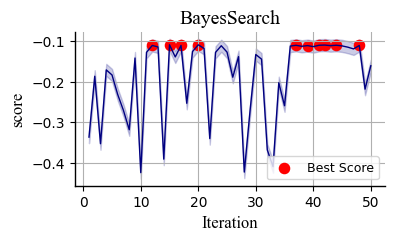

Top 1: Iteration 20, Score -0.10903234698816736
Top 2: Iteration 15, Score -0.10903234698816736
Top 3: Iteration 42, Score -0.10969911324285526
Top 4: Iteration 44, Score -0.11010187889112502
Top 5: Iteration 41, Score -0.11019257972033807
Top 6: Iteration 37, Score -0.1102784831926237
Top 7: Iteration 17, Score -0.1106296715198414
Top 8: Iteration 12, Score -0.1106296715198414
Top 9: Iteration 48, Score -0.11073430514878764
Top 10: Iteration 39, Score -0.11099787723258078


In [213]:
score = opt_model.cv_results_['mean_test_score'][:50]
Plotters.plot_iteration(y=score, title='BayesSearch', xlabel='Iteration', ylabel='score', legend_result=False, best_result=True, y_size=2, font='Times New Roman', weight='normal', mode=2, band_width=0.015)

In [214]:
best_params_ = model_reg.best_hyper(num_best=10, opt_model=opt_model, num_max=50)
best_params_

[{'alpha': 0.1, 'l1_ratio': 0.0, 'max_iter': 10000, 'tol': 1e-05},
 {'alpha': 0.1, 'l1_ratio': 0.0, 'max_iter': 10000, 'tol': 0.01},
 {'alpha': 0.09974890123060157,
  'l1_ratio': 0.02361517929034352,
  'max_iter': 3754,
  'tol': 1.0356243655956131e-05},
 {'alpha': 0.0984613029585139,
  'l1_ratio': 0.004729277883692707,
  'max_iter': 9285,
  'tol': 1.1279125921150666e-05},
 {'alpha': 0.09889774441083841,
  'l1_ratio': 0.021585147927381202,
  'max_iter': 2826,
  'tol': 0.0089375035130113},
 {'alpha': 0.09834187475228458,
  'l1_ratio': 0.0020152093419104626,
  'max_iter': 464,
  'tol': 1.4841597074702438e-05},
 {'alpha': 0.1, 'l1_ratio': 0.0, 'max_iter': 100, 'tol': 0.01},
 {'alpha': 0.1, 'l1_ratio': 0.0, 'max_iter': 100, 'tol': 1e-05},
 {'alpha': 0.0999839129201064,
  'l1_ratio': 0.08216303192680975,
  'max_iter': 9805,
  'tol': 0.002888604015030231},
 {'alpha': 0.09890029747941712,
  'l1_ratio': 0.060026841539475254,
  'max_iter': 9965,
  'tol': 0.005200514248312187}]

In [215]:
results_labels_df_CN_train, results_labels_df_CN_test,  results_model, results_per_fold_CN_train, results_per_fold_CN_test, df_CN_avg_train,df_CN_avg_test= model_reg.trainer(
        X=X_CN_1,
        y=y_CN_1,
        ID_label='ID_unique',
        ID=ID_CN_1,
        n_splits=10,
        n_iterations=20,
        params_=best_params_[0]
    )

c:\python_env\brain_age_env\Lib\site-packages\sklearn\linear_model\_coordinate_descent.py:678: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 5.980e+03, tolerance: 1.454e-01 Linear regression models with null weight for the l1 regularization term are more efficiently fitted using one of the solvers implemented in sklearn.linear_model.Ridge/RidgeCV instead.
  model = cd_fast.enet_coordinate_descent(
C:\Users/felip/OneDrive - Universidad Técnica Federico Santa María/Documentos/Brain/Brain_Age_Clock/Base_Models\base_regressor.py:207: FutureWarning: The behavior of DataFrame concatenation with empty or all-NA entries is deprecated. In a future version, this will no longer exclude empty or all-NA columns when determining the result dtypes. To retain the old behavior, exclude the relevant entries before the concat operation.
  results_labels_df_train = pd.

                            OLS Regression Results                            
Dep. Variable:                 y_pred   R-squared:                       0.263
Model:                            OLS   Adj. R-squared:                  0.260
Method:                 Least Squares   F-statistic:                     89.00
Date:                Tue, 14 Jan 2025   Prob (F-statistic):           2.86e-18
Time:                        14:13:06   Log-Likelihood:                -612.08
No. Observations:                 252   AIC:                             1228.
Df Residuals:                     250   BIC:                             1235.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         52.8607      1.414     37.395      0.0

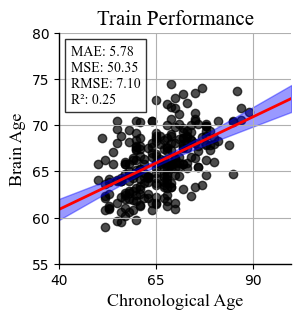

Error medio absoluto: 5.782973258217801
Error cuadrático medio: 50.34627365751593
Raíz del error cuadrático medio: 7.0955108101894915
Coeficiente de determinación (R²): 0.24774837597951815


In [216]:
Plotters.plot_regresion(y=df_CN_avg_train['y_pred'],x= df_CN_avg_train['y_labels'], label_='Test Data',x_ticks_step=25,y_ticks_step=5,x_min_limit=40,y_min_limit=55,x_max_limit=100,y_max_limit=80,color='Black', title='Train Performance',line_ideal=False,confidence_interval=True,  alpha=0.7,xlabel='Chronological Age',ylabel='Brain Age',color_confidence_interval='blue',alpha_confidence_interval=0.4,color_line_fit='red', details=True, font='Times New Roman', weight='normal', x_size=3,y_size=3, legend=False, fontsize=13, mode=2)

In [217]:
results_labels_df_CN_2_test, results_per_fold_CN_2_test, df_CN_2_avg_test = model_reg.test(X=X_CN_2, y=y_CN_2, ID= ID_CN_2, ID_label='ID_unique', n_splits=10, n_iterations=20,result_model=results_model)
results_labels_df_AD_test, results_per_fold_AD_test, df_AD_avg_test = model_reg.test(X=X_AD, y=y_AD, ID= ID_AD, ID_label='ID_unique', n_splits=10, n_iterations=20,result_model=results_model)
results_labels_df_FTD_test, results_per_fold_FTD_test, df_FTD_avg_test = model_reg.test(X=X_FTD, y=y_FTD, ID= ID_FTD, ID_label='ID_unique', n_splits=10, n_iterations=20,result_model=results_model)
results_labels_df_MCI_test, results_per_fold_MCI_test, df_MCI_avg_test = model_reg.test(X=X_MCI, y=y_MCI, ID= ID_MCI, ID_label='ID_unique', n_splits=10, n_iterations=20,result_model=results_model)


C:\Users/felip/OneDrive - Universidad Técnica Federico Santa María/Documentos/Brain/Brain_Age_Clock/Base_Models\base_regressor.py:296: FutureWarning: The behavior of DataFrame concatenation with empty or all-NA entries is deprecated. In a future version, this will no longer exclude empty or all-NA columns when determining the result dtypes. To retain the old behavior, exclude the relevant entries before the concat operation.
  results_labels_df_test = pd.concat([results_labels_df_test, temp_pat_df], ignore_index=True)
C:\Users/felip/OneDrive - Universidad Técnica Federico Santa María/Documentos/Brain/Brain_Age_Clock/Base_Models\base_regressor.py:296: FutureWarning: The behavior of DataFrame concatenation with empty or all-NA entries is deprecated. In a future version, this will no longer exclude empty or all-NA columns when determining the result dtypes. To retain the old behavior, exclude the relevant entries before the concat operation.
  results_labels_df_test = pd.concat([results_l

In [218]:
df_CN_1_seleccion = df_CN_filtrado[['ID_unique', 'Country_unique','Region', 'Age', 'Sex', 'Educ', 'MMSE', 'HDI', 'GINI', 'ODQ']]
df_CN_1_combined = df_CN_avg_test.merge(df_CN_1_seleccion, on='ID_unique', how='left')

df_CN_2_seleccion = df_CN_filtrado[['ID_unique', 'Country_unique','Region', 'Age', 'Sex', 'Educ', 'MMSE', 'HDI', 'GINI', 'ODQ']]
df_CN_2_combined = df_CN_2_avg_test.merge(df_CN_2_seleccion, on='ID_unique', how='left')


df_AD_seleccion = df_AD_filtrado[['ID_unique', 'Country_unique','Region', 'Age', 'Sex', 'Educ', 'MMSE',  'GINI', 'ODQ']]
df_AD_combined = df_AD_avg_test.merge(df_AD_seleccion, on='ID_unique', how='left')

df_FTD_seleccion = df_FTD_filtrado[['ID_unique', 'Country_unique','Region', 'Age', 'Sex', 'Educ', 'MMSE', 'GINI', 'ODQ']]
df_FTD_combined = df_FTD_avg_test.merge(df_FTD_seleccion, on='ID_unique', how='left')

df_MCI_seleccion = df_MCI_filtrado[['ID_unique', 'Country_unique', 'Region','Age', 'Sex', 'Educ', 'MMSE',  'GINI', 'ODQ']]
df_MCI_combined = df_MCI_avg_test.merge(df_MCI_seleccion, on='ID_unique', how='left')



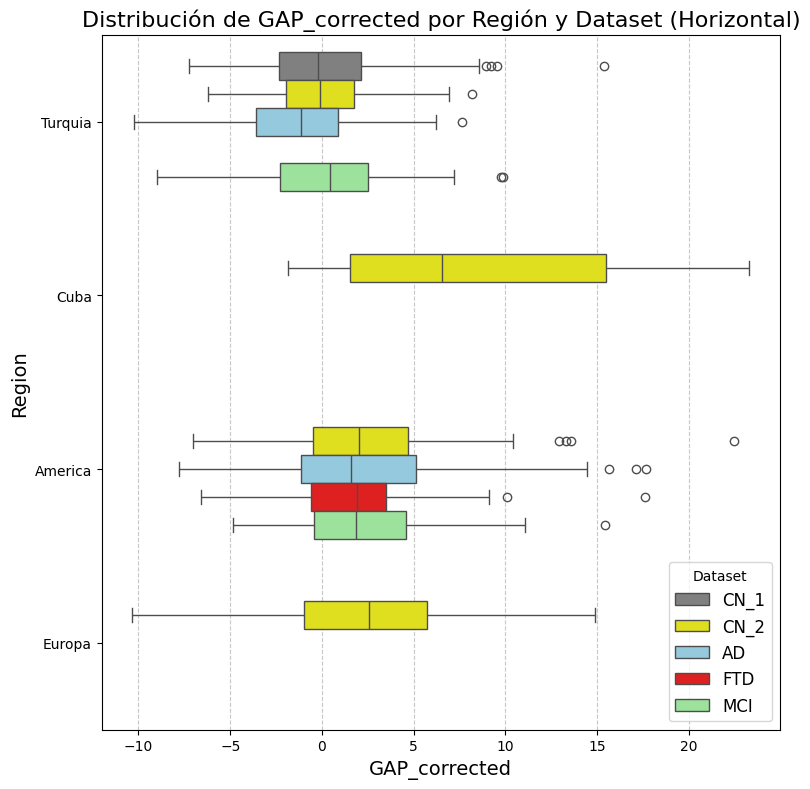

In [219]:
# Definir los datasets, etiquetas y colores personalizados
dataframes = [df_CN_1_combined, df_CN_2_combined, df_AD_combined, df_FTD_combined, df_MCI_combined]
labels = ["CN_1", "CN_2", "AD", "FTD", "MCI"]
variable = "GAP_corrected"
group_by = "Region"
colores_personalizados = ["gray", "yellow", "Skyblue", "red", "lightgreen"]  # Ejemplo de colores


# Llamar a la función
graficar_boxplot_horizontal(
    dataframes, 
    labels, 
    variable, 
    group_by, 
    colores_personalizados, 
    title="Distribución de GAP_corrected por Región y Dataset (Horizontal)"
)

In [220]:
shap_values_CN, shap_values_avg_CN, shap_summary_sorted_CN, shap_per_fold_CN = model_reg.calculate_multiple_shap(
    df_concatenado_CN, df_concatenado_CN,'ID_unique', results_per_fold_CN_train, results_per_fold_CN_test, results_model['model'],scaler=Scaler_reg_train
)

Importancia de características basada en suma de valores SHAP:
IAF_ORB_left: 258.6279407691279
High_subj_spec_RPD_HPC_left: 257.8409079718733
High_subj_spec_EPP_HPC_left: 257.84090797187156
TF_MFG_left: 254.75257113735853
IAF_HPC_right: 246.2972322951851
TF_SFG_right: 219.55230171545625
Alpha2_canon_RPD_CING_right: 213.3708939670657
Low_subj_spec_EPP_PARIET_left: 202.8306175403718
IAF_MFG_right: 194.10355406203027
TF_IFG_right: 190.85803402486576
IAF_ORB_right: 181.542701259548
Low_subj_spec_EPP_HPC_left: 174.43743212317844
Low_subj_spec_EPP_OCC_right: 172.45459971564713
IAF_IFG_left: 171.83473219745025
TF_HPC_right: 163.34507791948027
Low_subj_spec_EPP_PARIET_right: 161.42351340843118
Low_subj_spec_RPD_HPC_left: 153.06720526269814
TF_INS_right: 152.59579154391778
TF_HPC_left: 136.7434271303255
IAF_OCC_left: 117.54550572248864
IAF_OCC_right: 112.52695284988883
Low_subj_spec_EPP_CING_right: 111.97886583696386
High_subj_spec_EPP_HPC_right: 111.25381227202354
High_subj_spec_RPD_HPC_right:

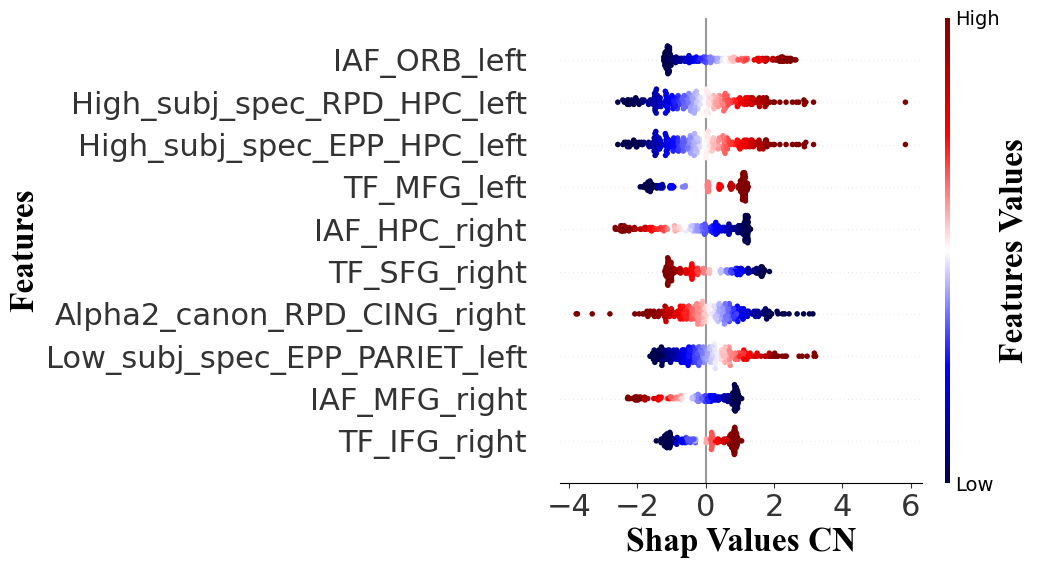

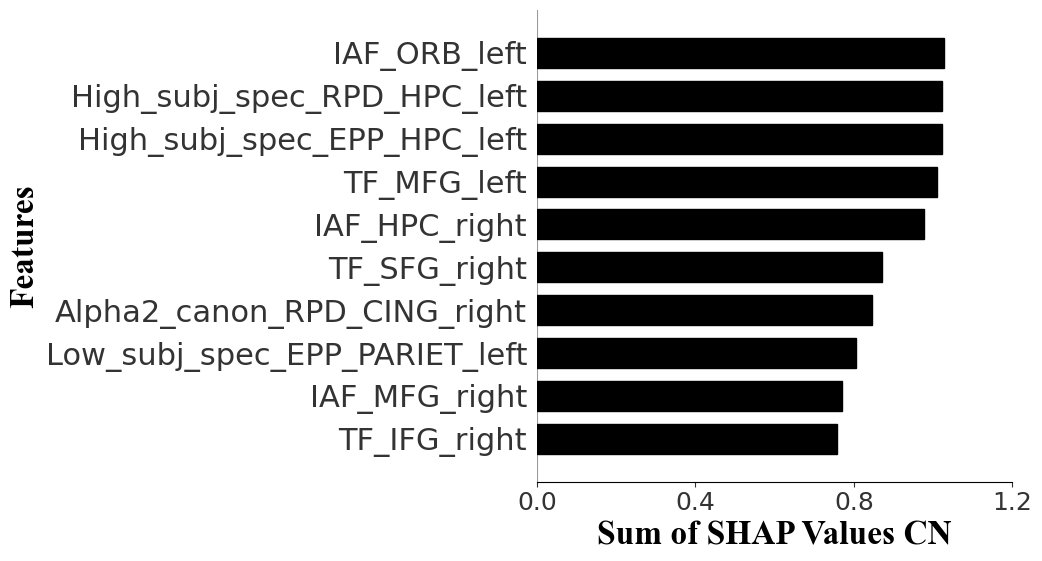

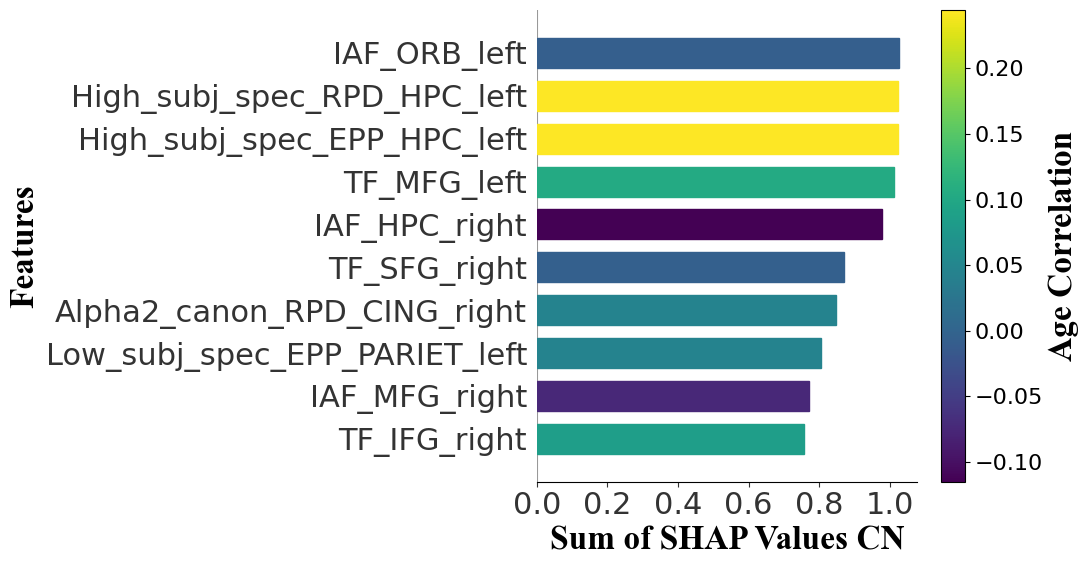

In [221]:
Plotters.plot_feature_importance(shap_values=shap_values_avg_CN,X_test=X_CN_1,y_test=y_CN_1, font= "Times New Roman", fontsize=24, xlabel1='Shap Values CN', xlabel2='Sum of SHAP Values CN',ylabel='Features', ylabel1='Features Values', ylabel2='Age Correlation', max_features=10)

In [222]:
shap_per_region_sorted_CN, normalized_result_sorted_CN=model_reg.shap_region(shap_summary_sorted=shap_summary_sorted_CN, num_max=20)

HPC_left: 1.000000
HPC_right: 0.418032
ORB_left: 0.263925
MFG_left: 0.259970
SFG_right: 0.224049
CING_right: 0.217741
PARIET_left: 0.206985
MFG_right: 0.198079
IFG_right: 0.194767
ORB_right: 0.185261
OCC_right: 0.175987
IFG_left: 0.175354
PARIET_right: 0.164730
INS_right: 0.155721
OCC_left: 0.119953


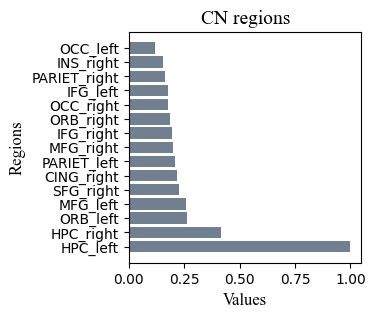

In [223]:
Plotters.plot_normalized_values(normalized_result_sorted_CN, color='slategray', name_set=f'CN regions',x_size=3,y_size=3,font='Times New Roman', fontsize=12, xlabel='Values', ylabel='Regions')

c:\python_env\brain_age_env\Lib\site-packages\nilearn\plotting\displays\_slicers.py:308: UserWarning: empty mask
  ims = self._map_show(img, type="imshow", threshold=threshold, **kwargs)


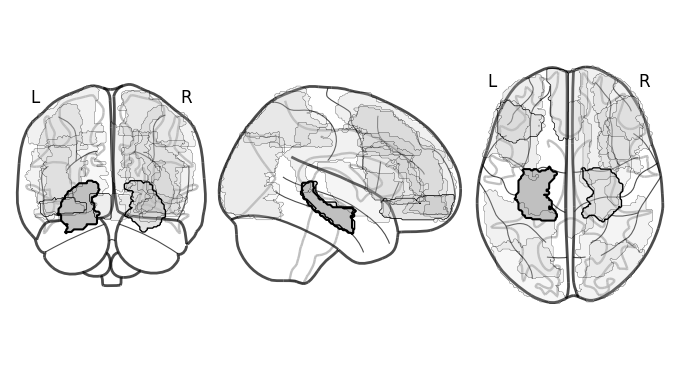

In [224]:
base_path = f'{path}cerebritos/'

Plotters.plot_brain_regions(normalized_result_sorted_CN, base_path, color='#C0C0C0')

In [225]:
import numpy as np
import pandas as pd

# Extraer coeficientes de los modelos y calcular el promedio en una sola línea
pesos_promedio = np.mean([modelo.coef_ for modelo in results_model['model']], axis=0)

# Crear el DataFrame y ordenarlo por magnitud de los pesos promedio
pesos_df = pd.DataFrame({
    'Característica': features,
    'Peso promedio': pesos_promedio
}).reindex(
    np.abs(pesos_promedio).argsort()[::-1]  # Ordenar por magnitud descendente
)

print(pesos_df)


                   Característica  Peso promedio
22    High_subj_spec_RPD_HPC_left       1.248321
14    High_subj_spec_EPP_HPC_left       1.248321
58                   IAF_ORB_left       1.202120
67                  IAF_HPC_right      -1.191087
50                    TF_MFG_left       1.119545
..                            ...            ...
41   Low_subj_spec_RPD_CING_right      -0.017368
11  Alpha2_canon_RPD_PARIET_right      -0.014011
3   Alpha2_canon_EPP_PARIET_right      -0.014011
0       Alpha2_canon_EPP_HPC_left       0.010243
6       Alpha2_canon_RPD_HPC_left       0.010243

[72 rows x 2 columns]


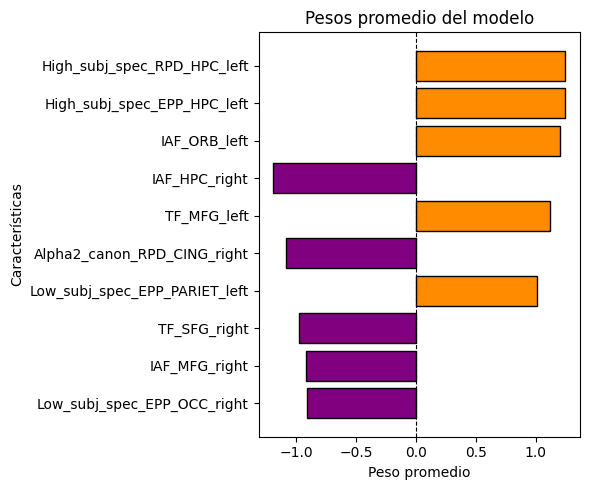

In [226]:
import matplotlib.pyplot as plt

# Seleccionar las 10 características principales
top_10 = pesos_df.head(10)

# Asignar colores según el signo del peso
colores = ['darkorange' if peso > 0 else 'purple' for peso in top_10['Peso promedio']]

# Crear el gráfico de barras
plt.figure(figsize=(6, 5))
plt.barh(
    top_10['Característica'], 
    top_10['Peso promedio'], 
    color=colores, 
    edgecolor='black'
)

# Personalizar el gráfico
plt.xlabel('Peso promedio')
plt.ylabel('Características')
plt.title('Pesos promedio del modelo')
plt.gca().invert_yaxis()  # Invertir el eje Y para que la característica más importante esté arriba
plt.axvline(0, color='black', linewidth=0.8, linestyle='--')  # Línea vertical en 0 para referencia
plt.tight_layout()

# Mostrar el gráfico
plt.show()
